# Module 5: Capstone Project

## Final Project Submission

Please fill out:
* Student name:  jenyl murdock
* Student pace: self paced 
* Scheduled project review date/time: April 14, 2020, 1:30pm EST
* Instructor name:  Jacob Eli Thomas
* Blog post URL: 

# The Dataset:   Brazilian Aeronautics Accidents

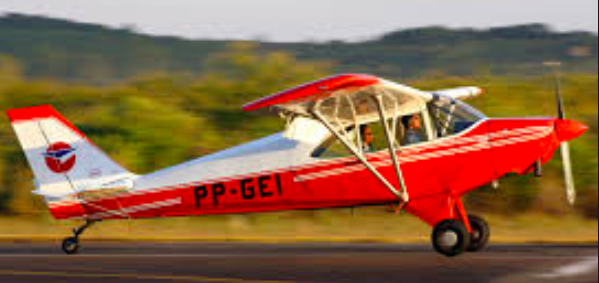

The Aero Boero AB-115 is an Argentine civil utility aircraft. It was developed from the AB-95-115, a refined AB-95 with a more powerful engine and improved aerodynamics. Specific differences included wheel spats, a redesigned engine cowling molded of fiberglass, and aluminum ailerons and flaps.

The type was successfully exported to Brazil, and used extensively as trainers by aero clubs.

Production of the AB-115 ended in January 1973.

https://en.wikipedia.org/wiki/Aero_Boero_AB-115

__Have you ever experienced the exhilaration of flight? Viewing the earth from the sky is a beautiful and exciting experience. Take a few minutes and see a flight of an Aero Boero AB-155 from take off, to landing on a grass runway!__

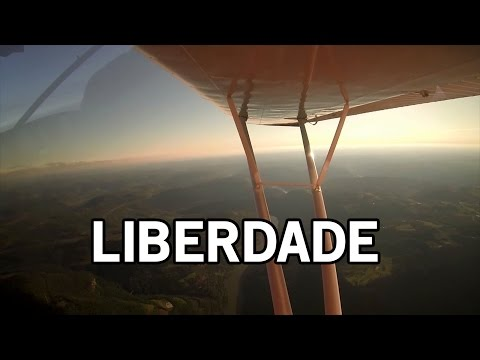

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('7jANKxxaND8', width=800, height=300)

### The data for this project is from kaggle:
https://www.kaggle.com/paulovasconcellos/aeronautics-accidents-in-brazil#aircrafts.csv

### The following information is taken from the kaggle data site:

### Context
For many years airplanes have been considered the second safest transport mean in the world - losing just to elevators. Traveling great distances in short time, those aircrafts have brought several advantaged for the world, both in commercial and regular application. Unfortunately, as any transport mean, aircrafts have their own count of tragedies. The last event involving airplanes - to the publication date - was the accident envolving the Brazilian soccer team Chapecoense and a LAMIA's aircraft, which was transporting them to Colombia for a Championship. This tragedy brought back discussions and controversies about aircraft's security and human capacity during aeronautics occurrences.

### Content
This dataset was available by CENIPA - Centro de Investigação e Prevenção de Acidentes aeronáuticos - or Aeronautical Accidents Investigation and Prevention Center. Such files contains informations about occurrences which envolved aircrafts in the last 10 years. You may access more updated data by visiting Brazilian Open Data's official website, or clicking in the download links below.

### Acknowledgements
This dataset is available for studies and analysis thanks to CENIPA.



## Importing Libraries

In [2]:
# import initial libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import datetime

import warnings
warnings.filterwarnings(action='ignore')

# Part I:  Features Engineering

## Obtain and Scrub the Data 

In [3]:
# import the first file

from subprocess import check_output
print(check_output(['ls', 'aircrafts.csv']).decode('utf8'))

aircrafts.csv



In [4]:
# assign the data to a file called 'data'
# print out the shape (#rows, #columns), and the first 5 rows of the data

data = pd.read_csv('aircrafts.csv', na_values=['****', '***',''],
                        header=0,
                        encoding='latin-1')
print ('shape of the data -', data.shape)

data.head()

shape of the data - (2043, 23)


Unnamed: 0  aircraft_id  occurrence_id registration  operator_id equipment  \
0           0            4          45602        PPGXE          241  AIRPLANE   
1           1           40          53551        PPGSZ          160  AIRPLANE   
2           2          118          43721        PTCMT         1232  AIRPLANE   
3           3          130          35556        PTEQI         3992  AIRPLANE   
4           4          191          32579        PPVMM         4365  AIRPLANE   

                  manufacturer     model engine_type  engines_amount  \
0  NEIVA INDUSTRIA AERONAUTICA      56-C      PISTON             1.0   
1  NEIVA INDUSTRIA AERONAUTICA      56-C      PISTON             1.0   
2               BEECH AIRCRAFT    95-B55      PISTON             2.0   
3  NEIVA INDUSTRIA AERONAUTICA  EMB-721C      PISTON             1.0   
4               BOEING COMPANY   737-241         JET             2.0   

       ...        registration_country  registration_category  \
0      ...                      BRAZIL                    PRI   
1      ...                      BRAZIL                    PRI   
2      ...                      BRAZIL                    TPX   
3      ...                      BRAZIL                    TPP   
4      ...                      BRAZIL                    TPR   

   registration_aviation origin_flight destination_flight    operation_phase  \
0            INSTRUCTION          SDPW               SDPW            UNKNOWN   
1            INSTRUCTION          SBBP               SBBP            TAKEOFF   
2               AEROTAXI           NaN                NaN  RUN AFTER LANDING   
3                PRIVATE          SNDU               SBSL  RUN AFTER LANDING   
4                REGULAR           NaN                NaN          ASCENSION   

  type_operation damage_level fatalities_amount extraction_day  
0    INSTRUCTION  SUBSTANTIAL               NaN     2016-07-30  
1    INSTRUCTION        LIGHT               NaN     2016-07-30  
2       AEROTAXI  SUBSTANTIAL               NaN     2016-07-30  
3        PRIVATE        LIGHT               NaN     2016-07-30  
4        REGULAR         NONE               NaN     2016-07-30  

[5 rows x 23 columns]

In [5]:
# import the second file
# print out the shape (#rows, #columns), and the first 5 rows of the data

data2 = pd.read_csv('occurrences.csv',
                        na_values=['****', '***',''],
                        header=0,
                        encoding='latin-1'
                       )
print ('shape of the data -', data2.shape)

data2.head()

shape of the data - (2027, 20)


Unnamed: 0  occurrence_id    classification  \
0           0          47965          ACCIDENT   
1           1          50313  SERIOUS INCIDENT   
2           2          34078          ACCIDENT   
3           3          44988          ACCIDENT   
4           4          38855          ACCIDENT   

                 type of occurrence localization  fu country aerodrome  \
0  ENGINE FAILURE DURING THE FLIGHT    ARIQUEMES  RO  BRAZIL      SJOG   
1      LANDING WITHOUT LANDING GEAR       CACOAL  RO  BRAZIL      SSKW   
2     LOSS OF CONTROL ON THE GROUND   CEREJEIRAS  RO  BRAZIL       NaN   
3                      SLOW LANDING      AMAJARI  RR  BRAZIL       NaN   
4        LOSS OF CONTROL IN THE AIR       ACEGUÁ  RS  BRAZIL       NaN   

  occurrence_day      time under_investigation investigating_command  \
0     2013-05-05  11:00:00             UNKNOWN              SERIPA-7   
1     2013-11-25  12:32:00                 YES              SERIPA-7   
2     2008-08-07  15:10:00                 YES              SERIPA-7   
3     2011-08-11  17:00:00                 YES              SERIPA-7   
4     2009-12-28  17:30:00                 YES              SERIPA-5   

  investigation_status report_number  published_report publication_day  \
0                  NaN           NaN               NaN             NaN   
1             FINISHED           NaN               1.0      2014-04-07   
2             FINISHED           NaN               1.0      2016-07-07   
3             FINISHED           NaN               1.0      2012-09-20   
4          IN PROGRESS     UNDEFINED               NaN             NaN   

   recommendation_amount  aircrafts_involved  takeoff extraction_day  
0                      0                   1      NaN     2016-07-30  
1                      0                   1      NaN     2016-07-30  
2                      0                   1      1.0     2016-07-30  
3                      4                   1      NaN     2016-07-30  
4                      0                   1      NaN     2016-07-30

### Let's look at the column names for each file

In [6]:
print ('aircrafts columns:', list(data.columns))

aircrafts columns: ['Unnamed: 0', 'aircraft_id', 'occurrence_id', 'registration', 'operator_id', 'equipment', 'manufacturer', 'model', 'engine_type', 'engines_amount', 'takeoff_max_weight (Lbs)', 'seatings_amount', 'year_manufacture', 'registration_country', 'registration_category', 'registration_aviation', 'origin_flight', 'destination_flight', 'operation_phase', 'type_operation', 'damage_level', 'fatalities_amount', 'extraction_day']


In [7]:
print ('occurrences columns:', list(data2.columns))

occurrences columns: ['Unnamed: 0', 'occurrence_id', 'classification', 'type of occurrence', 'localization', 'fu', 'country', 'aerodrome', 'occurrence_day', 'time', 'under_investigation', 'investigating_command', 'investigation_status', 'report_number', 'published_report', 'publication_day', 'recommendation_amount', 'aircrafts_involved', 'takeoff', 'extraction_day']


### Drop columns that are not relevant to this project

In [8]:
data = data.drop(['Unnamed: 0','aircraft_id', 'registration'], axis=1)
data = data.drop(['operator_id','origin_flight', 'destination_flight', 'extraction_day'], axis=1)

In [9]:
data2 = data2.drop(['Unnamed: 0','localization','aerodrome', 'investigation_status', 'report_number'], axis=1)
data2 = data2.drop(['published_report','publication_day','under_investigation'], axis=1)
data2 = data2.drop(['investigating_command','recommendation_amount','extraction_day','takeoff'], axis=1)

### Find out the data type of each column

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 16 columns):
occurrence_id               2043 non-null int64
equipment                   2042 non-null object
manufacturer                1933 non-null object
model                       2028 non-null object
engine_type                 2043 non-null object
engines_amount              2034 non-null float64
takeoff_max_weight (Lbs)    2043 non-null int64
seatings_amount             2025 non-null float64
year_manufacture            2039 non-null float64
registration_country        2031 non-null object
registration_category       2034 non-null object
registration_aviation       2043 non-null object
operation_phase             2042 non-null object
type_operation              2043 non-null object
damage_level                2043 non-null object
fatalities_amount           355 non-null float64
dtypes: float64(4), int64(2), object(10)
memory usage: 255.5+ KB


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 8 columns):
occurrence_id         2027 non-null int64
classification        2027 non-null object
type of occurrence    2027 non-null object
fu                    2025 non-null object
country               2027 non-null object
occurrence_day        2027 non-null object
time                  2027 non-null object
aircrafts_involved    2027 non-null int64
dtypes: int64(2), object(6)
memory usage: 126.8+ KB


### Merge the two data sets based on the 'occurrence id' column
reference information: https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html

In [12]:
merged_data = pd.merge(left=data, right=data2, how='left', left_on='occurrence_id', right_on='occurrence_id')
merged_data.head()

occurrence_id equipment                 manufacturer     model engine_type  \
0          45602  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA      56-C      PISTON   
1          53551  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA      56-C      PISTON   
2          43721  AIRPLANE               BEECH AIRCRAFT    95-B55      PISTON   
3          35556  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA  EMB-721C      PISTON   
4          32579  AIRPLANE               BOEING COMPANY   737-241         JET   

   engines_amount  takeoff_max_weight (Lbs)  seatings_amount  \
0             1.0                      1455              2.0   
1             1.0                      1455              2.0   
2             2.0                      5092              6.0   
3             1.0                      3600              6.0   
4             2.0                    115497            117.0   

   year_manufacture registration_country        ...         type_operation  \
0            1962.0               BRAZIL        ...            INSTRUCTION   
1            1960.0               BRAZIL        ...            INSTRUCTION   
2            1966.0               BRAZIL        ...               AEROTAXI   
3            1979.0               BRAZIL        ...                PRIVATE   
4            1975.0               BRAZIL        ...                REGULAR   

  damage_level fatalities_amount    classification  \
0  SUBSTANTIAL               NaN          ACCIDENT   
1        LIGHT               NaN  SERIOUS INCIDENT   
2  SUBSTANTIAL               NaN          ACCIDENT   
3        LIGHT               NaN  SERIOUS INCIDENT   
4         NONE               NaN  SERIOUS INCIDENT   

                 type of occurrence  fu country occurrence_day      time  \
0                           UNKNOWN  SP  BRAZIL     2011-06-14  20:00:00   
1     LOSS OF CONTROL ON THE GROUND  SP  BRAZIL     2015-11-05  19:15:00   
2                ABOUT LANDING GEAR  CE  BRAZIL     2010-12-15  09:00:00   
3                ABOUT LANDING GEAR  MA  BRAZIL     2009-02-04  15:25:00   
4  ENGINE FAILURE DURING THE FLIGHT  AM  BRAZIL     2008-06-07  14:45:00   

  aircrafts_involved  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  

[5 rows x 23 columns]

In [13]:
# shape of the merged data

merged_data.shape

(2043, 23)

In [14]:
# print out the column names of the merged dataset

print ('merged data columns:', list(merged_data.columns))

merged data columns: ['occurrence_id', 'equipment', 'manufacturer', 'model', 'engine_type', 'engines_amount', 'takeoff_max_weight (Lbs)', 'seatings_amount', 'year_manufacture', 'registration_country', 'registration_category', 'registration_aviation', 'operation_phase', 'type_operation', 'damage_level', 'fatalities_amount', 'classification', 'type of occurrence', 'fu', 'country', 'occurrence_day', 'time', 'aircrafts_involved']


In [15]:
# drop the occurrence_id now that the data has been merged

merged_data = merged_data.drop(['occurrence_id'], axis=1)

In [16]:
#  look at some statistical information on the numerical features
# we can see the maximum and minimum values for some of the features and where the mean is

merged_data.describe()

engines_amount  takeoff_max_weight (Lbs)  seatings_amount  \
count     2034.000000               2043.000000      2025.000000   
mean         1.244346              11750.045032         8.928889   
std          0.483653              48511.565643        26.922299   
min          0.000000                  0.000000         0.000000   
25%          1.000000               1860.000000         2.000000   
50%          1.000000               3600.000000         4.000000   
75%          2.000000               4750.000000         6.000000   
max          4.000000             630499.000000       301.000000   

       year_manufacture  fatalities_amount  aircrafts_involved  
count       2039.000000         355.000000         2043.000000  
mean        1902.494850           3.208451            1.018600  
std          402.024605          13.367108            0.173252  
min            0.000000           1.000000            1.000000  
25%         1975.000000           1.000000            1.000000  
50%         1986.000000           2.000000            1.000000  
75%         1999.000000           2.000000            1.000000  
max         2015.000000         199.000000            4.000000

___Right away we can tell that our data primarily is dealing with smaller planes / aircrafts___

## Check for missing data

In [17]:
merged_data.isnull().sum()

equipment                      1
manufacturer                 110
model                         15
engine_type                    0
engines_amount                 9
takeoff_max_weight (Lbs)       0
seatings_amount               18
year_manufacture               4
registration_country          12
registration_category          9
registration_aviation          0
operation_phase                1
type_operation                 0
damage_level                   0
fatalities_amount           1688
classification                 0
type of occurrence             0
fu                             2
country                        0
occurrence_day                 0
time                           0
aircrafts_involved             0
dtype: int64

### Inspect the data for each of the features and eliminate or replace any missing values 

### a) type of aircraft

In [18]:
# how many of each kind of aircraft were involved in an accident
# list the unique values of the equipment column and how many occurrances of each

print ('equipment:' , merged_data['equipment'].unique())
merged_data['equipment'].value_counts(dropna=False)

equipment: ['AIRPLANE' 'HELICOPTER' 'GLIDER' 'ULTRALIGHT' 'AMPHIBIOUS' 'UNKNOWN'
 'AIRSHIP' nan]


AIRPLANE      1603
HELICOPTER     264
ULTRALIGHT     151
GLIDER          11
AMPHIBIOUS       6
UNKNOWN          5
AIRSHIP          2
NaN              1
Name: equipment, dtype: int64

In [19]:
# replace the one nan value with 'unknown'

merged_data['equipment'] = merged_data['equipment'].fillna('UNKNOWN')

#### Look at the rows with 'UNKNOWN' as the equipment type in order to determine if a type can be assigned based on other information for that occurrence

In [20]:
df1 = merged_data[merged_data['equipment'].str.contains("UNKNOWN")] 
print(df1) 

     equipment manufacturer         model engine_type  engines_amount  \
1931   UNKNOWN          NaN           NaN     UNKNOWN             0.0   
1944   UNKNOWN          NaN           NaN     UNKNOWN             0.0   
1954   UNKNOWN          NaN           NaN     UNKNOWN             0.0   
1984   UNKNOWN          NaN           NaN     UNKNOWN             0.0   
2037   UNKNOWN          NaN           NaN     UNKNOWN             NaN   
2041   UNKNOWN   WZQ-OKECIE  PZL 106 KRUK     UNKNOWN             NaN   

      takeoff_max_weight (Lbs)  seatings_amount  year_manufacture  \
1931                         0              0.0               0.0   
1944                         0              0.0               0.0   
1954                         0              0.0               0.0   
1984                       458              0.0            2008.0   
2037                       992              NaN            2015.0   
2041                      6613              NaN               NaN   

    

#### Based on the type of operation and the type of occurrence, we can probably replace the unknown values with 'airplane'.  The only one that may be in question is the 'experimental' craft.

In [21]:
# replace unknown values with 'airplane'

merged_data['equipment'] = merged_data['equipment'].replace('UNKNOWN', 'AIRPLANE')

### b) manufacturer of the aircraft

In [22]:
# list the different manufacturer names and how many occurrances of each

print ('manufacturer:' , merged_data['manufacturer'].unique())

merged_data['manufacturer'].value_counts(dropna=False)

manufacturer: ['NEIVA INDUSTRIA AERONAUTICA' 'BEECH AIRCRAFT' 'BOEING COMPANY'
 'CESSNA AIRCRAFT' 'PIPER AIRCRAFT' 'HELIBRAS' 'EMBRAER' 'XAVANTE'
 'AERO BOERO' 'INDÚSTRIA PARANAENSE DE ESTRUTURAS'
 'CIA AERONAUTICA PAULISTA' 'MAULE AIRCRAFT' 'BELL HELICOPTER' 'LEARJET'
 nan 'LAVIASA' 'NORTH AMERICAN' 'TWIN COMMANDER' 'ROBINSON HELICOPTER'
 'MITSUBISHI' 'AGUSTA' 'SIKORSKY AIRCRAFT' 'MOONEY AIRCRAFT'
 'AEROSPATIALE AND ALENIA' 'FABRICACAO PROPRIA' 'CHINCUL SACAIFI'
 'EUROCOPTER FRANCE' 'HUGHES HELICOPTER' 'AIRBUS INDUSTRIE'
 'EUROCOPTER DEUTSCHLAND' 'AIR TRACTOR' 'LET AIRCRAFT INDUSTRIES' 'FOKKER'
 'MCDONNELL DOUGLAS' 'AMERICAN CHAMPION' 'AEROMOT' 'RAYTHEON AIRCRAFT'
 'CIRRUS DESIGN' 'SCHWEIZER' 'CONSOLIDATED' 'HAWKER BEECHCRAFT' 'STEMME'
 'ANTONIO CESAR DA SILVA AMARAL' 'NILSON SULZBACH PERES' 'BRITTEN-NORMAN'
 'INPAER INDUSTRIA PAULISTA E AERONÁUTICA'
 'FLYER INDUSTRIA AERONAUTICA LTDA' 'TERRA AMBIENTAL E INCORPORADORA LTDA'
 'LAKE AIRCRAFT' 'AEROBRAVO LTDA' 'HENRIQUE HAMILTON CERQUEIR

NEIVA INDUSTRIA AERONAUTICA              388
CESSNA AIRCRAFT                          354
PIPER AIRCRAFT                           157
EMBRAER                                  155
AERO BOERO                               126
ROBINSON HELICOPTER                      117
BEECH AIRCRAFT                           117
NaN                                      110
BELL HELICOPTER                           40
HELIBRAS                                  39
BOEING COMPANY                            34
EUROCOPTER FRANCE                         33
AIR TRACTOR                               26
CIRRUS DESIGN                             24
CIA AERONAUTICA PAULISTA                  24
AIRBUS INDUSTRIE                          20
AEROSPATIALE AND ALENIA                   18
SIKORSKY AIRCRAFT                         13
AEROMOT                                   12
RAYTHEON AIRCRAFT                         12
AGUSTA                                    11
FOKKER                                    10
MAULE AIRC

In [23]:
# replace the nan values with 'Unknown'

merged_data['manufacturer'] = merged_data['manufacturer'].fillna('UKNOWN')

### c) model of aircraft

In [24]:
# list the different models and how many occurrences of each

print ('model:' , merged_data['model'].unique())

merged_data['model'].value_counts(dropna=False)

model: ['56-C' '95-B55' 'EMB-721C' '737-241' '182P' 'EMB-711C' 'PA-28-140'
 'HB-350B' 'EMB-810C' 'A-122-B' 'PA-28R-200' 'AB-115' 'PA-30' '737-3K9'
 'EMB-820C NAVAJO' 'PA-18' '550' 'C90' 'KW1' '182M' 'AB-180' 'EMB-810D'
 'EMB-110P1' '56-C-1' 'EMB-820C CARAJA' '177B' 'CAP-4' '500' '172L' '402B'
 'PA-34-200' '56-B' '210K' '310Q' 'M-7-235' 'EMB-201' 'AS 350 BA' '210L'
 '206B' '182F' '412' 'AS 355 F2' 'EMB-711T' 'N35' '35' 'EMB-720D'
 'EMB-201A' '35A' 'EMB-202' 'EAGLE II' '208' 'EMB-721D' 'U206C' '650' '58'
 '150J' 'S550' '170A' 'EMB-200A' '182G' 'PA-25-235' 'A36' 'PA-31' 'A188B'
 'A-122-A' 'EMB-712' '400A' 'E55' '172D' '172A' 'AT-6D' '500-S' '200'
 'PA-39' '208B' 'EMB-110' 'U206E' 'EMB-710C' 'R22 BETA' 'F90' 'B90'
 'EMB-720C' '206L-3' 'R44' '310K' 'MU-2B-36A' 'PA-18-150' 'PA-25-260'
 'EMB-110P' 'T210N' 'NE-821' '95-C55' 'EMB-711ST' 'EMB-200' 'A109C'
 'S-76A' 'U206F' '25' 'M20M' '337A' 'ATR-42-300' 'V35B' 'P35' 'T210L'
 'V35' 'PA-32-300' 'PA-24-260' '180D' 'MU-2B-20' '170B' 'EMB-711B'
 'RAN

AB-115                 111
EMB-202                 78
EMB-201A                72
EMB-810C                61
EMB-810D                38
R44                     35
58                      34
EMB-202A                33
210L                    31
152                     30
A188B                   30
EMB-711C                28
R22 BETA                28
R44 II                  28
206B                    26
EMB-720D                25
EMB-201                 25
CAP-4                   24
AS 350 B2               23
PA-25-235               23
R22                     22
PA-34-220T              21
182P                    19
EMB-712                 18
56-C                    18
EMB-721C                18
SR22                    17
EMB-711ST               17
95-B55                  17
EMB-720C                16
                      ... 
M-6-235                  1
BK117 C-2                1
AT-802                   1
407                      1
PA-31T2                  1
182R                     1
F

In [25]:
# replace the nan values in the model column with 'Unknown'

merged_data['model'] = merged_data['model'].fillna('UKNOWN')

### d) engine type

In [26]:
# list the types of engines and how many occurrances of each

print ('engine_type:' , data['engine_type'].unique())

merged_data['engine_type'].value_counts()

engine_type: ['PISTON' 'JET' 'TURBOSHAFT' 'TURBOPROP' 'WITHOUT TRACTION' 'UNKNOWN']


PISTON              1601
TURBOSHAFT           148
TURBOPROP            139
JET                  117
UNKNOWN               28
WITHOUT TRACTION      10
Name: engine_type, dtype: int64

### e) number of engines

In [27]:
# list the number of engines and how many occurrances of each

print ('engines_amount:' , merged_data['engines_amount'].unique())

data['engines_amount'].value_counts(dropna=False)

engines_amount: [ 1.  2.  0.  4.  3. nan]


 1.0    1490
 2.0     502
 0.0      31
NaN        9
 3.0       7
 4.0       4
Name: engines_amount, dtype: int64

In [28]:
# for the 9 NaN values, look at the other information in the row to see if the 
# number of engines can be determined

engines_null = pd.isnull(merged_data['engines_amount'])
merged_data[engines_null]

equipment     manufacturer         model engine_type  engines_amount  \
2026    AIRPLANE  CESSNA AIRCRAFT          N210     UNKNOWN             NaN   
2028    AIRPLANE           UKNOWN        UKNOWN     UNKNOWN             NaN   
2031    AIRPLANE  CESSNA AIRCRAFT          210R     UNKNOWN             NaN   
2032    AIRPLANE  CESSNA AIRCRAFT          210D     UNKNOWN             NaN   
2036  ULTRALIGHT           UKNOWN        UKNOWN     UNKNOWN             NaN   
2037    AIRPLANE           UKNOWN        UKNOWN     UNKNOWN             NaN   
2038  ULTRALIGHT           UKNOWN        UKNOWN     UNKNOWN             NaN   
2039  ULTRALIGHT           UKNOWN        UKNOWN     UNKNOWN             NaN   
2041    AIRPLANE       WZQ-OKECIE  PZL 106 KRUK     UNKNOWN             NaN   

      takeoff_max_weight (Lbs)  seatings_amount  year_manufacture  \
2026                      3800              NaN            1978.0   
2028                         0              NaN               0.0   
2031                      3849              NaN            1985.0   
2032                      3099              NaN            1964.0   
2036                         0              NaN            2015.0   
2037                       992              NaN            2015.0   
2038                       881              NaN            2000.0   
2039                         0              NaN            2015.0   
2041                      6613              NaN               NaN   

     registration_country registration_category        ...          \
2026                  USA                   TPP        ...           
2028               BRAZIL                   TPP        ...           
2031               BRAZIL                   TPP        ...           
2032               BRAZIL                   TPP        ...           
2036               BRAZIL                   PET        ...           
2037               BRAZIL                   PET        ...           
2038               BRAZIL                   TPP        ...           
2039               BRAZIL                   PET        ...           
2041                  NaN                   EXT        ...           

     type_operation damage_level fatalities_amount classification  \
2026        PRIVATE  SUBSTANTIAL               NaN       ACCIDENT   
2028   AGRICULTURAL    DESTROYED               1.0       ACCIDENT   
2031        PRIVATE  SUBSTANTIAL               NaN       ACCIDENT   
2032        PRIVATE    DESTROYED               1.0       ACCIDENT   
2036        PRIVATE    DESTROYED               1.0       ACCIDENT   
2037        PRIVATE  SUBSTANTIAL               1.0       ACCIDENT   
2038        PRIVATE  SUBSTANTIAL               1.0       ACCIDENT   
2039        PRIVATE    DESTROYED               1.0       ACCIDENT   
2041   AGRICULTURAL    DESTROYED               2.0       ACCIDENT   

                                type of occurrence  fu   country  \
2026                 LOSS OF CONTROL ON THE GROUND  MT    BRAZIL   
2028                    LOSS OF CONTROL IN THE AIR  MT    BRAZIL   
2031              ENGINE FAILURE DURING THE FLIGHT  PA    BRAZIL   
2032                    LOSS OF CONTROL IN THE AIR  GO    BRAZIL   
2036                    LOSS OF CONTROL IN THE AIR  SC    BRAZIL   
2037  COLLISION AGAINST OBSTACLE DURING THE FLIGHT  TO    BRAZIL   
2038                            STRUCTURAL FAILURE  SP    BRAZIL   
2039                            STRUCTURAL FAILURE  SP    BRAZIL   
2041  COLLISION AGAINST OBSTACLE DURING THE FLIGHT  EX  PARAGUAY   

     occurrence_day      time aircrafts_involved  
2026     2013-04-09  11:50:00                  1  
2028     2015-03-14  18:00:00                  1  
2031     2015-07-14  19:30:00                  1  
2032     2015-07-20  00:15:00                  1  
2036     2015-08-23  20:20:00                  1  
2037     2015-07-28  21:05:00                  1  
2038     2015-08-21  20:50:00                  1  
2039     2015-11-02  09:30:00               

Based on the other information in the rows, we can confidently replace the unknowns with 1 engine.

In [29]:
# replace the nan values with 1 for the engines amount

merged_data['engines_amount'] = merged_data['engines_amount'].fillna(1)

In [30]:
# convert the engines_amount column to integer data type

merged_data['engines_amount'] = merged_data['engines_amount'].astype(int)

### f) aviation registration type

In [31]:
# list the types of aviation registration and how many occurrances of each

print ('registration aviation:' , merged_data['registration_aviation'].unique())

merged_data['registration_aviation'].value_counts(dropna=False)

registration aviation: ['INSTRUCTION' 'AEROTAXI' 'PRIVATE' 'REGULAR' 'DIRECT ADMINISTRATION'
 'MULTIPLE' 'AGRICULTURAL' 'EXPERIMENTAL' 'SPECIALIZED'
 'INDIRECT ADMINISTRATION' 'NOT REGULAR' 'UNKNOWN' 'HISTORIC']


PRIVATE                    760
INSTRUCTION                370
AEROTAXI                   272
EXPERIMENTAL               202
AGRICULTURAL               196
REGULAR                     85
SPECIALIZED                 64
DIRECT ADMINISTRATION       45
UNKNOWN                     25
MULTIPLE                    11
INDIRECT ADMINISTRATION      7
NOT REGULAR                  5
HISTORIC                     1
Name: registration_aviation, dtype: int64

### g) number of seatings in the aircraft

In [32]:
# list the seating capacity and how many occurrances of each

print ('seatings_amount:' , merged_data['seatings_amount'].unique())

merged_data['seatings_amount'].value_counts(dropna=False)

seatings_amount: [  2.   6. 117.   4.   7.   3. 142.  10.   1.  21.   5.  15.  20.  11.
   8.  19.  13.  17.   9.  14.  50.   0. 125. 154.  34.  49. 184. 179.
 157. 153. 115. 301. 183. 151. 148. 156. 185. 188.  32.  52. 107. 166.
 242.  27.  71.  73. 240. 173.  54. 197. 194. 152.  12. 193.  75.  16.
  nan]


 2.0      444
 6.0      382
 1.0      328
 4.0      320
 7.0      133
 0.0       83
 5.0       52
 3.0       48
 10.0      42
 8.0       37
 11.0      27
NaN        18
 14.0      14
 21.0      11
 107.0      9
 184.0      8
 50.0       7
 9.0        7
 156.0      7
 17.0       5
 73.0       5
 20.0       5
 125.0      4
 153.0      3
 154.0      3
 15.0       3
 54.0       3
 19.0       2
 52.0       2
 193.0      2
 71.0       2
 242.0      2
 32.0       1
 117.0      1
 185.0      1
 179.0      1
 301.0      1
 75.0       1
 194.0      1
 166.0      1
 115.0      1
 197.0      1
 142.0      1
 173.0      1
 188.0      1
 13.0       1
 183.0      1
 157.0      1
 16.0       1
 12.0       1
 152.0      1
 34.0       1
 49.0       1
 240.0      1
 148.0      1
 151.0      1
 27.0       1
Name: seatings_amount, dtype: int64

In [33]:
# for the NaN values, look at the other information in the row to see if the 
# number of seats can be determined

null_values = pd.isnull(merged_data['seatings_amount'])
merged_data[null_values]

equipment       manufacturer                model engine_type  \
1998    AIRPLANE  HAWKER BEECHCRAFT          HAWKER 4000         JET   
1999    AIRPLANE           ROCKWELL                  685   TURBOPROP   
2000  ULTRALIGHT             UKNOWN               M22 FW      PISTON   
2026    AIRPLANE    CESSNA AIRCRAFT                 N210     UNKNOWN   
2027    AIRPLANE     PIPER AIRCRAFT           PA-32R-301   TURBOPROP   
2028    AIRPLANE             UKNOWN               UKNOWN     UNKNOWN   
2029    AIRPLANE    CESSNA AIRCRAFT                 172S      PISTON   
2030    AIRPLANE            EMBRAER             EMB-202A      PISTON   
2031    AIRPLANE    CESSNA AIRCRAFT                 210R     UNKNOWN   
2032    AIRPLANE    CESSNA AIRCRAFT                 210D     UNKNOWN   
2033    AIRPLANE            EMBRAER              EMB-505         JET   
2034  ULTRALIGHT             UKNOWN  P2002 SIERRA DELUXE      PISTON   
2036  ULTRALIGHT             UKNOWN               UKNOWN     UNKNOWN   
2037    AIRPLANE             UKNOWN               UKNOWN     UNKNOWN   
2038  ULTRALIGHT             UKNOWN               UKNOWN     UNKNOWN   
2039  ULTRALIGHT             UKNOWN               UKNOWN     UNKNOWN   
2040    AIRPLANE     BEECH AIRCRAFT                B36TC      PISTON   
2041    AIRPLANE         WZQ-OKECIE         PZL 106 KRUK     UNKNOWN   

      engines_amount  takeoff_max_weight (Lbs)  seatings_amount  \
1998               2                     39242              NaN   
1999               2                      8575              NaN   
2000               1                      1322              NaN   
2026               1                      3800              NaN   
2027               1                      3600              NaN   
2028               1                         0              NaN   
2029               1                      2550              NaN   
2030               1                      3968              NaN   
2031               1                      3849              NaN   
2032               1                      3099              NaN   
2033               2                     17967              NaN   
2034               1                      1322              NaN   
2036               1                         0              NaN   
2037               1                       992              NaN   
2038               1                       881              NaN   
2039               1                         0              NaN   
2040               1                      3849              NaN   
2041               1                      6613              NaN   

      year_manufacture registration_country registration_category  \
1998               0.0                  USA                   TPP   
1999               0.0               BRAZIL                   TPP   
2000            2014.0               BRAZIL                   PET   
2026            1978.0                  USA                   TPP   
2027            1983.0                  NaN                   TPP   
2028               0.0               BRAZIL                   TPP   
2029               NaN               BRAZIL                   PRI   
2030            2014.0               BRAZIL                SAE-AG   
2031            1985.0               BRAZIL                   TPP   
2032            1964.0               BRAZIL                   TPP   
2033            2010.0         SAUDI ARABIA                   EXT   
2034               NaN               BRAZIL                   PET   
2036            2015.0               BRAZIL                   PET   
2037            2015.0               BRAZIL                   PET   
2038            2000.0               BRAZIL                   TPP   
2039            2015.0               BRAZIL                   PET   
2040            1997.0                  NaN                   EXT   
2041               NaN                  NaN                   EXT   

            ...         type_operation damage_level 

#### The Cessna 210 series has 6 seats and the ultralights in Brazil tend to have 2 seats.  With some research some of these values can be filled in.

This feature is not used in the machine learning or deep learning models so I am not going to be concerned about the null values at this time.

### h) year the aircraft was manufactured

In [34]:
# list the year manufactured and how many occurrances of each

print ('year_manufacture:' , merged_data['year_manufacture'].unique())

merged_data['year_manufacture'].value_counts(dropna=False)

year_manufacture: [1962. 1960. 1966. 1979. 1975. 1974. 1977. 1973. 1983. 1982. 1978. 1988.
 1990. 1976. 1951. 1981. 1980. 1989. 1969. 1986. 1970. 1947. 1972. 1971.
 1991. 1963. 1940. 1992. 1961.    0. 1993. 1994. 1987. 1968. 1950. 1964.
 1984. 1995. 1985. 1942. 1953. 2001. 1946. 1997. 1948. 1996. 1967. 1952.
 1956. 1945. 1965. 1999. 2004. 2000. 2005. 1998. 2003. 2006. 1958. 2002.
 2007. 1954. 1949. 2008. 2009. 2010. 1959. 1957. 1936. 2011. 1955. 2012.
 2013. 2014.   nan 2015.]


 0.0       87
 1980.0    82
 1976.0    81
 1992.0    80
 1974.0    69
 1973.0    65
 1977.0    63
 1979.0    61
 1993.0    61
 1981.0    60
 2007.0    57
 1990.0    53
 2008.0    50
 2010.0    46
 1978.0    45
 1998.0    42
 1991.0    42
 2006.0    41
 2012.0    41
 1975.0    39
 1997.0    39
 1982.0    37
 2009.0    37
 2011.0    37
 2005.0    36
 1988.0    35
 2004.0    34
 2001.0    34
 1995.0    31
 1972.0    29
           ..
 2013.0    14
 1961.0    13
 1966.0    12
 1946.0    12
 1996.0    11
 1963.0    11
 1960.0    11
 1947.0     9
 1965.0     7
 1948.0     6
 1964.0     6
 1967.0     5
 1950.0     5
 1951.0     5
NaN         4
 1954.0     3
 1953.0     3
 1958.0     3
 1949.0     3
 2015.0     3
 1957.0     2
 1956.0     2
 2014.0     2
 1940.0     2
 1959.0     1
 1955.0     1
 1945.0     1
 1936.0     1
 1952.0     1
 1942.0     1
Name: year_manufacture, Length: 76, dtype: int64

In [35]:
# replace the nan value with 0 for the year manufactured.
# This appears to be the value representing 'unknown'.

merged_data['year_manufacture'] = merged_data['year_manufacture'].fillna(0)

### i) country of registration

In [36]:
# list the country and how many occurrances of each

print ('registration_country:' , merged_data['registration_country'].unique())

merged_data['registration_country'].value_counts(dropna=False)

registration_country: ['BRAZIL' 'USA' 'UNKNOWN' nan 'FRENCH' 'SPAIN' 'SOUTH AFRICA' 'URUGUAY'
 'RUSSIA' 'POLAND' 'SAUDI ARABIA' 'GERMAN']


BRAZIL          2000
USA               22
NaN               12
URUGUAY            1
GERMAN             1
UNKNOWN            1
FRENCH             1
SAUDI ARABIA       1
SOUTH AFRICA       1
RUSSIA             1
POLAND             1
SPAIN              1
Name: registration_country, dtype: int64

In [37]:
# fill the NaN values with the value 'UNKNOWN'

merged_data['registration_country'] = merged_data['registration_country'].fillna('UKNOWN')

### j) registration category

In [38]:
# list the category of registration and how many occurrances of each

print ('registration_category:' , merged_data['registration_category'].unique())

merged_data['registration_category'].value_counts(dropna=False)

registration_category: ['PRI' 'TPX' 'TPP' 'TPR' 'ADE' 'M14' 'ADD' 'SAE-AG' 'PET' 'SAE' 'PIN'
 'SAE-AL' 'SAE-AP' 'ADF' 'AIF' 'S00' 'TPN' 'AID' 'PEX' nan 'PUH' 'D07'
 'M24' 'EXT']


TPP       760
PRI       359
TPX       272
SAE-AG    196
PET       193
TPR        85
SAE        57
ADE        38
EXT        16
PIN        11
NaN         9
PEX         9
AIF         6
ADF         5
S00         5
TPN         5
SAE-AP      4
M14         4
SAE-AL      3
ADD         2
PUH         1
AID         1
D07         1
M24         1
Name: registration_category, dtype: int64

__I couldn't find any relevant information on the meaning of these categories so I am dropping the column for now__

In [39]:
# drop the registration_category column

merged_data = merged_data.drop(['registration_category'], axis=1)

### k)  phase of the flight when accident occurred

In [40]:
# list the phase of flight operation and how many occurrances of each

print ('operation_phase:' , merged_data['operation_phase'].unique())

merged_data['operation_phase'].value_counts(dropna=False)

operation_phase: ['UNKNOWN' 'TAKEOFF' 'RUN AFTER LANDING' 'ASCENSION' 'MANEUVER' 'HOVERING'
 'FINAL APPROXIMATION' 'RUSH ON THE GROUND' 'LANDING' 'DESCEND' 'CRUISE'
 'TRAFFIC CIRCUIT' 'TAXI' 'RUSH IN THE AIR' 'SPECIALIZED' 'ANOTHER PHASE'
 'LOW ALTITUDE NAVIGATION' 'FINAL STRETCH' 'ENGINE START'
 'ENGINE OR ROTOR CHECKING' 'VERTICAL TAKEOFF' 'GROUND OPERATION'
 'PARKING' nan]


LANDING                     391
TAKEOFF                     352
CRUISE                      237
RUN AFTER LANDING           189
SPECIALIZED                 115
UNKNOWN                     103
MANEUVER                    101
ASCENSION                   100
FINAL APPROXIMATION          70
DESCEND                      67
ANOTHER PHASE                60
LOW ALTITUDE NAVIGATION      58
TRAFFIC CIRCUIT              53
TAXI                         41
RUSH ON THE GROUND           29
RUSH IN THE AIR              18
ENGINE START                 14
FINAL STRETCH                12
HOVERING                     10
PARKING                       9
GROUND OPERATION              6
VERTICAL TAKEOFF              4
ENGINE OR ROTOR CHECKING      3
NaN                           1
Name: operation_phase, dtype: int64

In [41]:
# replace the 1 nan value with 'Unknown'

merged_data['operation_phase'] = merged_data['operation_phase'].fillna('UNKNOWN')

### l) operational purpose of the aircraft

In [42]:
# list the operational purpose and how many occurrances of each

print ('type operation:' , merged_data['type_operation'].unique())

merged_data['type_operation'].value_counts()

type operation: ['INSTRUCTION' 'AEROTAXI' 'PRIVATE' 'REGULAR' 'POLICIAL' 'AGRICULTURAL'
 'EXPERIMENTAL' 'SPECIALIZED' 'NOT REGULAR' 'UNKNOWN']


PRIVATE         775
INSTRUCTION     366
AEROTAXI        273
AGRICULTURAL    266
EXPERIMENTAL    153
REGULAR          91
SPECIALIZED      42
POLICIAL         37
UNKNOWN          26
NOT REGULAR      14
Name: type_operation, dtype: int64

### m) fatalities

In [43]:
# list the number of fatalities and how many occurrances of each

print ('fatalities:' , merged_data['fatalities_amount'].unique())

merged_data['fatalities_amount'].value_counts(dropna=False)

fatalities: [ nan   2.   6.  10.  24.   3.   1.   4.   5.  19. 199.   7. 154.   8.
  14.  16.]


NaN       1688
 1.0       166
 2.0       102
 3.0        32
 4.0        24
 5.0        12
 6.0         6
 8.0         3
 7.0         3
 199.0       1
 154.0       1
 16.0        1
 14.0        1
 19.0        1
 24.0        1
 10.0        1
Name: fatalities_amount, dtype: int64

#### There is a lot of missing values for the fatalities feature.  I may look at this feature for EDA but will essentially drop it for the rest of the project.

### n) damage level to the aircraft

In [44]:
# list the damage level and how many occurrances of each

print ('damage level:' , merged_data['damage_level'].unique())

merged_data['damage_level'].value_counts()

damage level: ['SUBSTANTIAL' 'LIGHT' 'NONE' 'UNKNOWN' 'DESTROYED']


SUBSTANTIAL    1193
DESTROYED       352
LIGHT           261
NONE            168
UNKNOWN          69
Name: damage_level, dtype: int64

### o) classification of the situation

In [45]:
# list the classification and how many occurrances of each

print ('classification:' , merged_data['classification'].unique())

merged_data['classification'].value_counts()

classification: ['ACCIDENT' 'SERIOUS INCIDENT']


ACCIDENT            1484
SERIOUS INCIDENT     559
Name: classification, dtype: int64

#### I was going to eliminate the classification at first but it actually does gives us some information 

### p) issue associated with the accident

In [46]:
# list the issue involved and how many occurrances of each

print ('type of occurrence:' , merged_data['type of occurrence'].unique())

merged_data['type of occurrence'].value_counts()

type of occurrence: ['UNKNOWN' 'LOSS OF CONTROL ON THE GROUND' 'ABOUT LANDING GEAR'
 'ENGINE FAILURE DURING THE FLIGHT' 'SYSTEM / COMPONENT FAILURE'
 'ABOUT PASSENGERS/CREW DURING THE FLIGHT' 'LOSS OF CONTROL IN THE AIR'
 'LANDING ON UNPREDICTABLE PLACE' 'LANDING WITHOUT LANDING GEAR'
 'SLOW LANDING' 'FUEL STARVATION' 'AIR TRAFFIC'
 'COLLISION AGAINST OBSTACLE DURING THE FLIGHT' 'ANOTHER TYPES'
 'COMPONENT LOSS ON THE GROUND' 'LOSS OF COMPONENT DURING THE FLIGHT'
 'COLLISION AGAINST OBSTACLE ON THE GROUND' 'HARD LANDING'
 'ABOUT PROPELLER' 'LANDING BEFORE THE TRACK AREA'
 'METEOROLOGICAL PHENOMENOM ON THE GROUND'
 'METEOROLOGICAL PHENOMENOM IN THE AIR' 'TIRE BURST' 'FLIGHT COMMANDS'
 'TERRAIN COLLISION' 'ABOUT ROTOR' 'LEAVING THE TRACK'
 'AIRCRAFTS COLLISION ON THE GROUND' 'STRUCTURAL FAILURE'
 'ABOUT WINDOWS / DOORS / WINDSHIELD' 'FIRE ON THE GROUND'
 'LOW ALTITUDE MANEUVERS' 'FLUID LEAKS' 'LOAD LAUNCH'
 'AIRCRAFT HIT BY OBJECT' 'FIRE DURING THE FLIGHT'
 'EXPLOSIVE / NOT INTENTIONAL D

ENGINE FAILURE DURING THE FLIGHT                    377
LOSS OF CONTROL ON THE GROUND                       325
LOSS OF CONTROL IN THE AIR                          311
COLLISION AGAINST OBSTACLE DURING THE FLIGHT        142
ABOUT LANDING GEAR                                  130
ANOTHER TYPES                                        87
FUEL STARVATION                                      74
SYSTEM / COMPONENT FAILURE                           61
UNKNOWN                                              57
LANDING WITHOUT LANDING GEAR                         54
LANDING ON UNPREDICTABLE PLACE                       44
COLLISION AGAINST OBSTACLE ON THE GROUND             40
HARD LANDING                                         40
SLOW LANDING                                         30
METEOROLOGICAL PHENOMENOM IN THE AIR                 27
LOSS OF COMPONENT DURING THE FLIGHT                  27
TERRAIN COLLISION                                    21
LOW ALTITUDE MANEUVERS                          

### q) time of occurrence

In [47]:
# list the time of the accident and how many occurrances of each

print ('time:' , merged_data['time'].unique())

merged_data['time'].value_counts()

time: ['20:00:00' '19:15:00' '09:00:00' '15:25:00' '14:45:00' '14:00:00'
 '18:00:00' '14:50:00' '19:00:00' '15:30:00' '20:40:00' '10:40:00'
 '11:00:00' '20:10:00' '20:20:00' '01:54:00' '19:40:00' '16:30:00'
 '20:38:00' '14:49:00' '13:11:00' '20:30:00' '16:50:00' '23:50:00'
 '11:35:00' '18:58:00' '12:30:00' '17:30:00' '16:24:00' '19:08:00'
 '11:40:00' '19:39:00' '16:00:00' '09:55:00' '13:40:00' '18:30:00'
 '22:48:00' '11:25:00' '14:15:00' '14:40:00' '11:30:00' '18:15:00'
 '21:00:00' '13:00:00' '18:40:00' '11:15:00' '18:20:00' '12:20:00'
 '11:45:00' '15:36:00' '21:10:00' '14:20:00' '10:25:00' '16:40:00'
 '17:25:00' '13:39:00' '15:57:00' '18:45:00' '13:29:00' '18:25:00'
 '23:25:00' '20:25:00' '14:10:00' '17:35:00' '23:30:00' '03:15:00'
 '17:55:00' '18:35:00' '19:30:00' '16:33:00' '19:35:00' '09:43:00'
 '20:42:00' '13:50:00' '15:54:00' '13:47:00' '15:10:00' '14:05:00'
 '13:55:00' '21:05:00' '22:10:00' '12:40:00' '17:45:00' '19:25:00'
 '14:25:00' '22:50:00' '10:00:00' '10:30:00' '00:00:00' 

20:30:00    55
20:00:00    53
17:00:00    45
18:00:00    42
13:00:00    42
12:00:00    41
19:30:00    40
19:00:00    38
13:30:00    38
14:30:00    35
17:30:00    35
12:30:00    35
14:00:00    34
18:30:00    32
11:30:00    28
16:30:00    27
21:00:00    25
15:30:00    24
11:00:00    24
15:00:00    22
21:30:00    18
10:30:00    18
17:40:00    15
20:45:00    15
20:40:00    15
16:00:00    15
10:00:00    15
20:20:00    15
12:40:00    15
15:10:00    14
            ..
19:13:00     1
04:30:00     1
17:33:00     1
04:27:00     1
13:47:00     1
14:57:00     1
18:53:00     1
13:33:00     1
01:32:00     1
21:54:00     1
23:53:00     1
11:21:00     1
00:35:00     1
02:35:00     1
16:17:00     1
18:05:00     1
17:46:00     1
19:42:00     1
00:50:00     1
08:31:00     1
23:14:00     1
20:04:00     1
14:38:00     1
22:06:00     1
22:49:00     1
11:11:00     1
23:37:00     1
01:44:00     1
22:36:00     1
21:47:00     1
Name: time, Length: 437, dtype: int64

#### It is interesting to note that the top 2 times are 8 & 8:30 pm.

### r) year - extract the year from the occurrence day values

In [48]:
# here is an efficient way to extract the year from string format date:
# pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html

merged_data['year'] = pd.DatetimeIndex(merged_data['occurrence_day']).year
merged_data = merged_data.drop(['occurrence_day'], axis=1)
merged_data.head()


equipment                 manufacturer     model engine_type  \
0  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA      56-C      PISTON   
1  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA      56-C      PISTON   
2  AIRPLANE               BEECH AIRCRAFT    95-B55      PISTON   
3  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA  EMB-721C      PISTON   
4  AIRPLANE               BOEING COMPANY   737-241         JET   

   engines_amount  takeoff_max_weight (Lbs)  seatings_amount  \
0               1                      1455              2.0   
1               1                      1455              2.0   
2               2                      5092              6.0   
3               1                      3600              6.0   
4               2                    115497            117.0   

   year_manufacture registration_country registration_aviation  ...   \
0            1962.0               BRAZIL           INSTRUCTION  ...    
1            1960.0               BRAZIL           INSTRUCTION  ...    
2            1966.0               BRAZIL              AEROTAXI  ...    
3            1979.0               BRAZIL               PRIVATE  ...    
4            1975.0               BRAZIL               REGULAR  ...    

  type_operation damage_level fatalities_amount    classification  \
0    INSTRUCTION  SUBSTANTIAL               NaN          ACCIDENT   
1    INSTRUCTION        LIGHT               NaN  SERIOUS INCIDENT   
2       AEROTAXI  SUBSTANTIAL               NaN          ACCIDENT   
3        PRIVATE        LIGHT               NaN  SERIOUS INCIDENT   
4        REGULAR         NONE               NaN  SERIOUS INCIDENT   

                 type of occurrence  fu country      time aircrafts_involved  \
0                           UNKNOWN  SP  BRAZIL  20:00:00                  1   
1     LOSS OF CONTROL ON THE GROUND  SP  BRAZIL  19:15:00                  1   
2                ABOUT LANDING GEAR  CE  BRAZIL  09:00:00                  1   
3                ABOUT LANDING GEAR  MA  BRAZIL  15:25:00                  1   
4  ENGINE FAILURE DURING THE FLIGHT  AM  BRAZIL  14:45:00                  1   

   year  
0  2011  
1  2015  
2  2010  
3  2009  
4  2008  

[5 rows x 21 columns]

### s) number of aircrafts involved

In [49]:
# list the number of aircrafts involved and how many occurrances of each

print ('aircrafts involved' , merged_data['aircrafts_involved'].unique())

merged_data['aircrafts_involved'].value_counts()

aircrafts involved [1 2 4]


1    2013
2      26
4       4
Name: aircrafts_involved, dtype: int64

#### One option would be to investigate just the incidences involving only one aircraft.

In [50]:
# check to verify there are no more null values
merged_data.isnull().sum()

equipment                      0
manufacturer                   0
model                          0
engine_type                    0
engines_amount                 0
takeoff_max_weight (Lbs)       0
seatings_amount               18
year_manufacture               0
registration_country           0
registration_aviation          0
operation_phase                0
type_operation                 0
damage_level                   0
fatalities_amount           1688
classification                 0
type of occurrence             0
fu                             2
country                        0
time                           0
aircrafts_involved             0
year                           0
dtype: int64

__Fatalities will be looked at in the data exploration section.  This feature is dropped for the machine and deep learning models.__

In [51]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2042
Data columns (total 21 columns):
equipment                   2043 non-null object
manufacturer                2043 non-null object
model                       2043 non-null object
engine_type                 2043 non-null object
engines_amount              2043 non-null int64
takeoff_max_weight (Lbs)    2043 non-null int64
seatings_amount             2025 non-null float64
year_manufacture            2043 non-null float64
registration_country        2043 non-null object
registration_aviation       2043 non-null object
operation_phase             2043 non-null object
type_operation              2043 non-null object
damage_level                2043 non-null object
fatalities_amount           355 non-null float64
classification              2043 non-null object
type of occurrence          2043 non-null object
fu                          2041 non-null object
country                     2043 non-null object
time       

In [52]:
# I am going to drop these columns
# 'fu' is the state the aircraft was registered in and I am not concerned with the aircraft weight

merged_data = merged_data.drop(['fu','takeoff_max_weight (Lbs)' ], axis=1)

# Part II: Exploratory Data Analysis

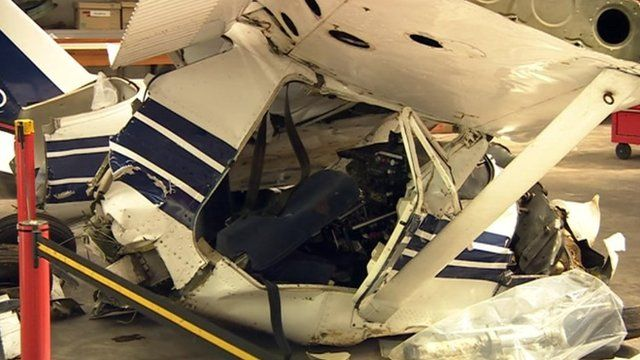

In [53]:
# look at the first 5 rows of our data

merged_data.head()

equipment                 manufacturer     model engine_type  \
0  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA      56-C      PISTON   
1  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA      56-C      PISTON   
2  AIRPLANE               BEECH AIRCRAFT    95-B55      PISTON   
3  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA  EMB-721C      PISTON   
4  AIRPLANE               BOEING COMPANY   737-241         JET   

   engines_amount  seatings_amount  year_manufacture registration_country  \
0               1              2.0            1962.0               BRAZIL   
1               1              2.0            1960.0               BRAZIL   
2               2              6.0            1966.0               BRAZIL   
3               1              6.0            1979.0               BRAZIL   
4               2            117.0            1975.0               BRAZIL   

  registration_aviation    operation_phase type_operation damage_level  \
0           INSTRUCTION            UNKNOWN    INSTRUCTION  SUBSTANTIAL   
1           INSTRUCTION            TAKEOFF    INSTRUCTION        LIGHT   
2              AEROTAXI  RUN AFTER LANDING       AEROTAXI  SUBSTANTIAL   
3               PRIVATE  RUN AFTER LANDING        PRIVATE        LIGHT   
4               REGULAR          ASCENSION        REGULAR         NONE   

   fatalities_amount    classification                type of occurrence  \
0                NaN          ACCIDENT                           UNKNOWN   
1                NaN  SERIOUS INCIDENT     LOSS OF CONTROL ON THE GROUND   
2                NaN          ACCIDENT                ABOUT LANDING GEAR   
3                NaN  SERIOUS INCIDENT                ABOUT LANDING GEAR   
4                NaN  SERIOUS INCIDENT  ENGINE FAILURE DURING THE FLIGHT   

  country      time  aircrafts_involved  year  
0  BRAZIL  20:00:00                   1  2011  
1  BRAZIL  19:15:00                   1  2015  
2  BRAZIL  09:00:00                   1  2010  
3  BRAZIL  15:25:00                   1  2009  
4  BRAZIL  14:45:00                   1  2008

### a)  accidents per year

Text(0.5, 1.0, 'Number of Accidents per Year')

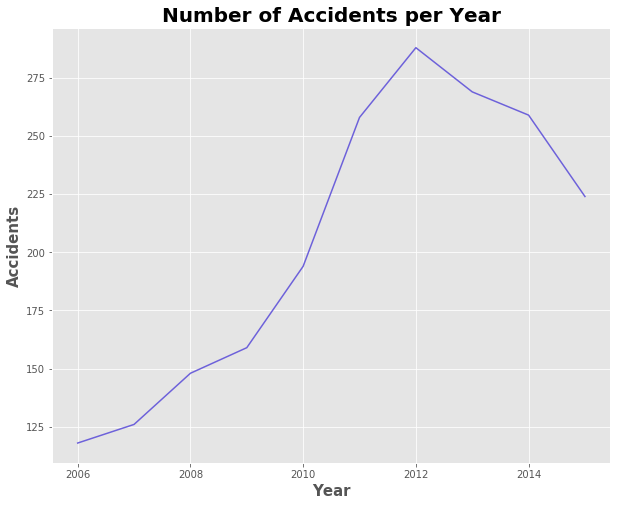

In [54]:
Year = merged_data['year'].value_counts().sort_index()
Year.plot(figsize=(10,8), color='#6d61da')

plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Accidents', fontsize=15, fontweight='bold')
plt.title('Number of Accidents per Year', fontsize=20, fontweight='bold')

__The number of accidents drastically increased from 2006 until 2012 when it peaked.__

### b) type of aircraft

In [55]:
# graph of accidents by equipment type

equip = merged_data['equipment'].value_counts()
equip = equip.sort_values(ascending=False)
equip

# equip.plot.barh(color='#d9436a', figsize=(10,5))
# plt.title('Accidents by Aircraft Type', fontsize=20, fontweight='bold')

AIRPLANE      1609
HELICOPTER     264
ULTRALIGHT     151
GLIDER          11
AMPHIBIOUS       6
AIRSHIP          2
Name: equipment, dtype: int64

Pie chart graph adapted from:  
https://github.com/emilypfeifer/sitcoms/blob/master/2_sitcoms_EDA.ipynb
[10]

colors selected from iWantHue:  
https://medialab.github.io/iwanthue/

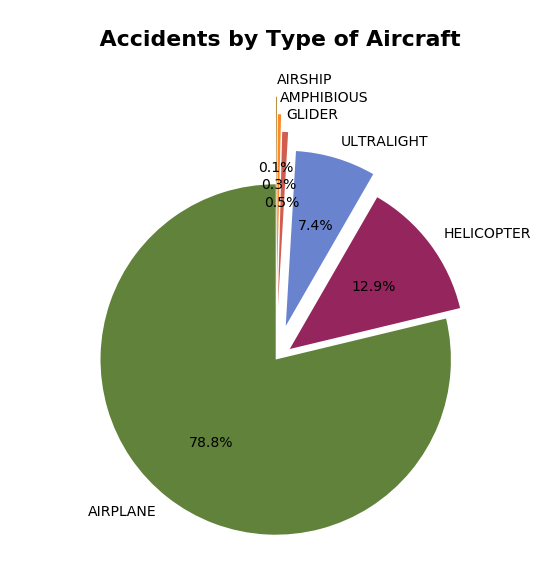

In [56]:
# Create a list of colors (from iWantHue)
colors = ["#61823a", "#95255d", '#6983cf','#d05d50', "#ff8927", "#b9903d"]

# Create a pie chart
fig1, ax1 = plt.subplots(figsize = (8, 8)) #creating pie chart, setting size

patches, texts, autotext = ax1.pie(
    # using type of equipment
    equip.values,
    # with the labels being equipment names
    labels=equip.index,
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, .1, .2, .3, .4, .5),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    #fontsize
    textprops={'fontsize': 14}
    )

# View the plot drop above
ax1.axis('equal')
plt.title('\n Accidents by Type of Aircraft \n', fontsize = 22, fontweight='bold')

# View the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Accidents by Type of Aircraft')

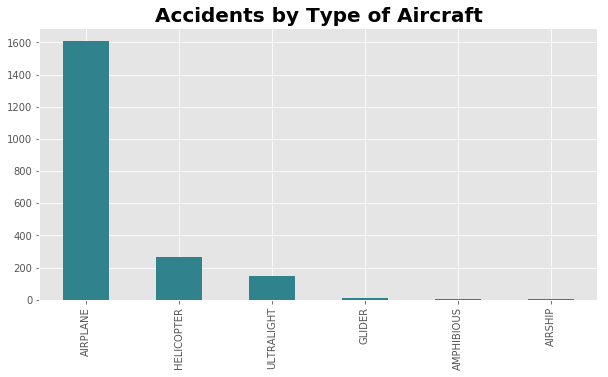

In [57]:
# type of aircraft as a bar chart

equip.plot.bar(color='#30838c', figsize=(10,5))
plt.title('Accidents by Type of Aircraft', fontsize=20, fontweight='bold')

__Here we can see that this data mainly involves airplanes accidents.__ 

### c)  engine type

Text(0.5, 1.0, 'Accidents by Engine Type')

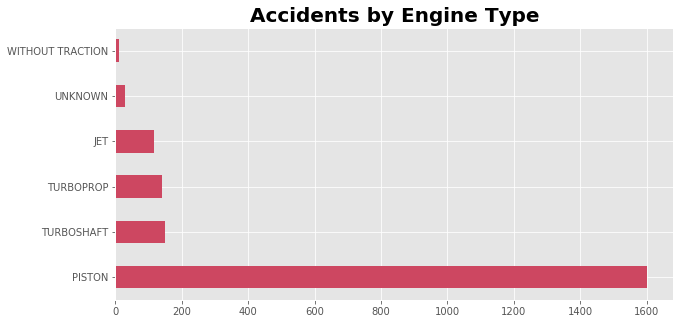

In [58]:
#engine type
engine = data['engine_type'].value_counts()
engine= engine.sort_values(ascending=False)

engine.plot.barh(color='#cd4761', figsize=(10,5))
plt.title('Accidents by Engine Type', fontsize=20, fontweight='bold')

__Most of these aircraft were powered by a piston engine__

### d)  main use or purpose of the aircraft

Text(0.5, 1.0, 'Accidents by Purpose of the Aircraft')

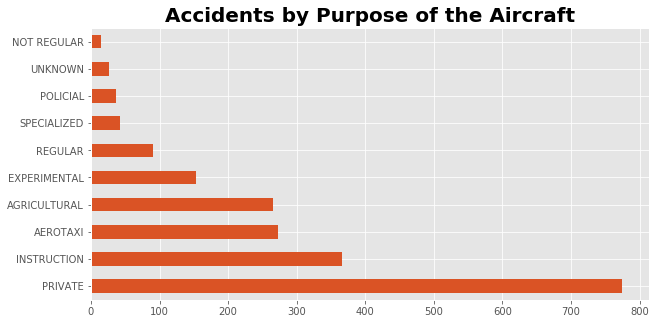

In [59]:
# type of operation

type_op = data['type_operation'].value_counts()
type_op = type_op.sort_values(ascending=False)

type_op.plot.barh(color='#da5325', figsize=(10,5))
plt.title('Accidents by Purpose of the Aircraft', fontsize=20, fontweight='bold')

__We can see that the main purpose of these aircrafts were for personal use.  The next common uses were for instruction, hired transportation, and agricultural purposes.__

### e)  aviation registration type

In [60]:
# registration aviation
reg_av = merged_data['registration_aviation'].value_counts()
reg_data = merged_data[merged_data['registration_aviation'].isin(reg_av.index[reg_av > 40]).values]

reg_av = reg_data['registration_aviation'].value_counts()
reg_av = reg_av.sort_values(ascending=False)

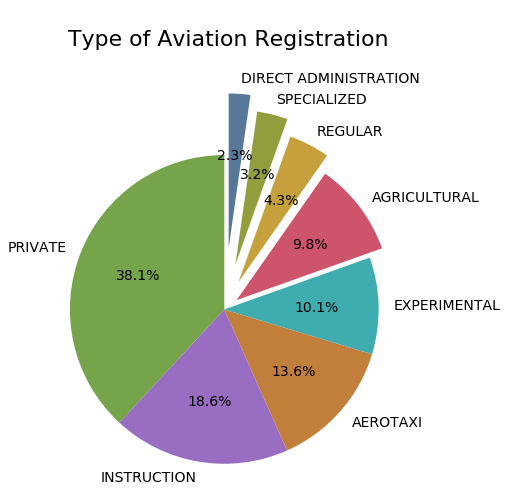

In [61]:
# Create a list of colors (from iWantHue)
colors = ['#76a44a', '#996dc2', '#c27f3c','#3fadaf','#cd546b', '#c6a03b', '#929d3d', '#577899']

# Create a pie chart
fig1, ax1 = plt.subplots(figsize = (7,7)) #creating pie chart, setting size

patches, texts, autotext = ax1.pie(
    # using registration
    reg_av.values,
    # with the labels being registration names
    labels=reg_av.index,
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, 0, .1, .2, .3, .4),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    #fontsize
    textprops={'fontsize': 14}
    )

# View the plot drop above
ax1.axis('equal')
plt.title('\n Type of Aviation Registration\n', fontsize = 22)
# View the plot
plt.tight_layout()
plt.show()

#### The Operation Type feature and the Registration Aviation feature have a lot of similarities.  It is not clear why they are two different categories.

### f)  phase of flight when accident occurred

Text(0.5, 1.0, 'Accidents by Phase of Operation')

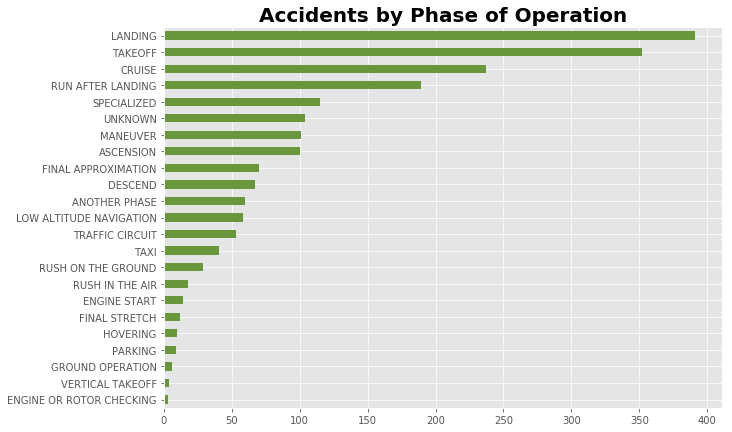

In [62]:
# operation phase

phase = merged_data['operation_phase'].value_counts()
phase = phase.sort_values(ascending=True)

phase.plot.barh(color='#69983c', figsize=(10,7))
plt.title('Accidents by Phase of Operation', fontsize=20, fontweight='bold')

__Landing and taking off are the two main causes of these accidents.__

### g) incident that caused the accident

Text(0.5, 1.0, 'Incident That Caused Accident')

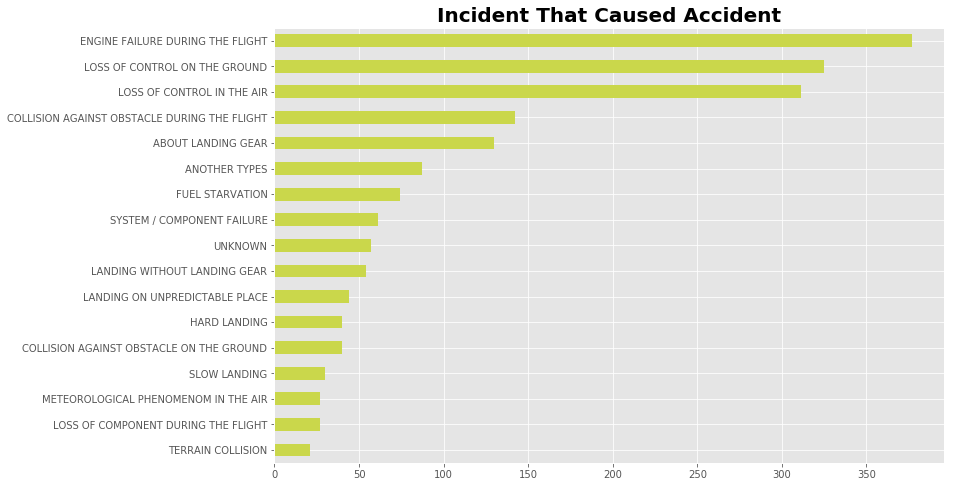

In [63]:
# type of occurrence

o_type = merged_data['type of occurrence'].value_counts()
type_data = merged_data[merged_data['type of occurrence'].isin(o_type.index[o_type > 20]).values]

o_type = type_data['type of occurrence'].value_counts()
o_type = o_type.sort_values(ascending=True)

o_type.plot.barh(color='#cad74b', figsize=(12,8))
plt.title('Incident That Caused Accident', fontsize=20, fontweight='bold')

__Suprisingly, engine failure was the number one cause.  Loss of control take second and third, which is a little more expected.__

### h) airplane compared to helicopter

In [64]:
# compare airplane vs helicopter accidents
# extract the airplane data and assign to 'plane_data'

plane_data = merged_data[merged_data['equipment'] == 'AIRPLANE']
pdamage = plane_data['damage_level'].value_counts()
pdamage = pdamage.sort_values(ascending=False)

# extract the helicopter data and assign to 'heli_data'
heli_data = merged_data[merged_data['equipment'] == 'HELICOPTER']
hdamage = heli_data['damage_level'].value_counts()
hdamage = hdamage.sort_values(ascending=False)

In [65]:
# check index values of helicpoter data
hdamage.index

Index(['SUBSTANTIAL', 'DESTROYED', 'LIGHT', 'NONE', 'UNKNOWN'], dtype='object')

In [66]:
# check the number of occurrances of each index value
hdamage.values

array([160,  58,  23,  14,   9])

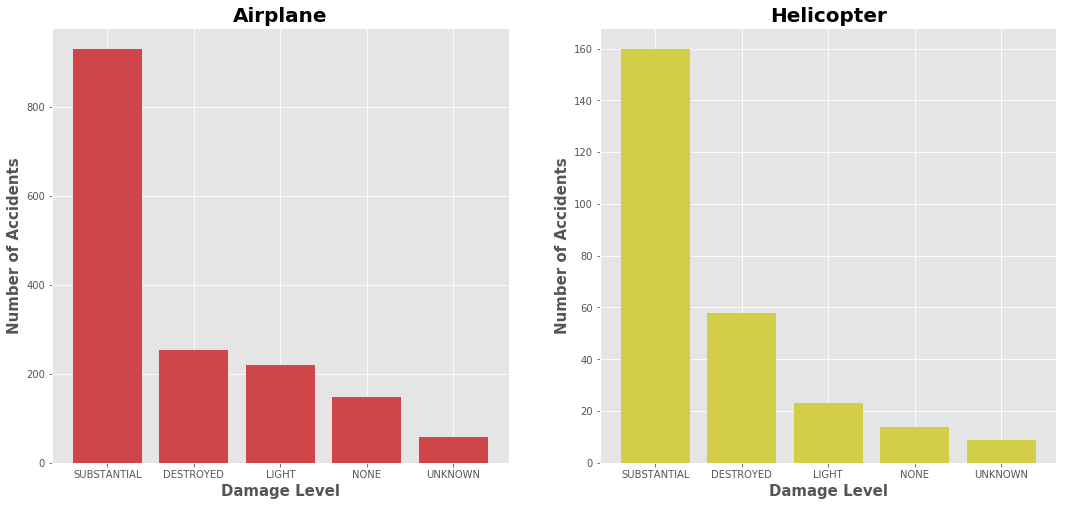

In [67]:
# Plot the difference in damage levels between airplane accidents and helicopter accidents

new_figure = plt.figure(figsize=(18,8))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.bar(pdamage.index, pdamage.values, color='#d04547')
ax2.bar(hdamage.index, hdamage.values, color='#d2ce48')

ax.set_xlabel('Damage Level', fontsize=15, fontweight='bold')
ax.set_ylabel('Number of Accidents', fontsize=15, fontweight='bold')
ax.set_title ('Airplane', fontsize=20, fontweight='bold')

ax2.set_xlabel('Damage Level', fontsize=15, fontweight='bold')
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight='bold')
ax2.set_title ('Helicopter', fontsize=20, fontweight='bold')

plt.show()


#### These graphs look very similar, just take notice of the y axis range.

### i)  manufacturers with 10 or more occurrences

In [68]:
# create a new data set that only contains data where the number of accidents per manufacturer is >= 10

manuf = merged_data['manufacturer'].value_counts()
manuf_data = merged_data[merged_data['manufacturer'].isin(manuf.index[manuf >= 10]).values]

In [69]:
# look at the first 5 rows of the adjusted data set
manuf_data.head()

equipment                 manufacturer     model engine_type  \
0  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA      56-C      PISTON   
1  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA      56-C      PISTON   
2  AIRPLANE               BEECH AIRCRAFT    95-B55      PISTON   
3  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA  EMB-721C      PISTON   
4  AIRPLANE               BOEING COMPANY   737-241         JET   

   engines_amount  seatings_amount  year_manufacture registration_country  \
0               1              2.0            1962.0               BRAZIL   
1               1              2.0            1960.0               BRAZIL   
2               2              6.0            1966.0               BRAZIL   
3               1              6.0            1979.0               BRAZIL   
4               2            117.0            1975.0               BRAZIL   

  registration_aviation    operation_phase type_operation damage_level  \
0           INSTRUCTION            UNKNOWN    INSTRUCTION  SUBSTANTIAL   
1           INSTRUCTION            TAKEOFF    INSTRUCTION        LIGHT   
2              AEROTAXI  RUN AFTER LANDING       AEROTAXI  SUBSTANTIAL   
3               PRIVATE  RUN AFTER LANDING        PRIVATE        LIGHT   
4               REGULAR          ASCENSION        REGULAR         NONE   

   fatalities_amount    classification                type of occurrence  \
0                NaN          ACCIDENT                           UNKNOWN   
1                NaN  SERIOUS INCIDENT     LOSS OF CONTROL ON THE GROUND   
2                NaN          ACCIDENT                ABOUT LANDING GEAR   
3                NaN  SERIOUS INCIDENT                ABOUT LANDING GEAR   
4                NaN  SERIOUS INCIDENT  ENGINE FAILURE DURING THE FLIGHT   

  country      time  aircrafts_involved  year  
0  BRAZIL  20:00:00                   1  2011  
1  BRAZIL  19:15:00                   1  2015  
2  BRAZIL  09:00:00                   1  2010  
3  BRAZIL  15:25:00                   1  2009  
4  BRAZIL  14:45:00                   1  2008

Text(0.5, 1.0, 'Manufacturer of Aircraft')

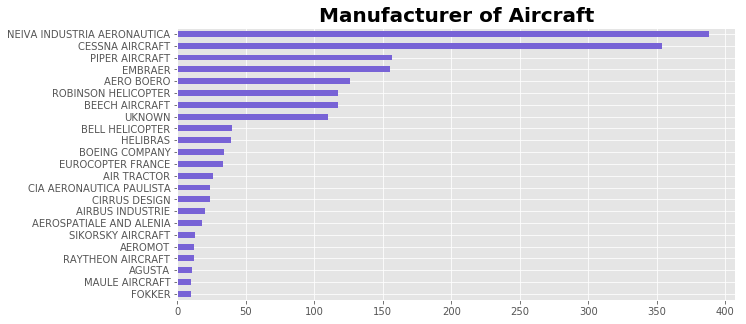

In [70]:
# plot the graph of accidents by manufacturers

manuf = manuf_data['manufacturer'].value_counts()
manuf = manuf.sort_values(ascending=True)

manuf.plot.barh(color='#7863d6', figsize=(10,5))
plt.title('Manufacturer of Aircraft', fontsize=20, fontweight='bold')

__The main manufacturers of the aircrafts in these accidents are Neiva Industria Aeronautica and Cessna Aircraft.  Remember that the number one issue was engine failure.  A question would be if there was an issue with a part or process in the manufacturing of these planes that precipitated in engine failure, especially during the years between 2010 and 2012.__

### j)  models with 10 or more occurrences

In [71]:
# eliminate the models with accounts < 10

model = merged_data['model'].value_counts()
model_data = merged_data[merged_data['model'].isin(model.index[model >= 10]).values]
model_data.head(3)

equipment                 manufacturer   model engine_type  engines_amount  \
0  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA    56-C      PISTON               1   
1  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA    56-C      PISTON               1   
2  AIRPLANE               BEECH AIRCRAFT  95-B55      PISTON               2   

   seatings_amount  year_manufacture registration_country  \
0              2.0            1962.0               BRAZIL   
1              2.0            1960.0               BRAZIL   
2              6.0            1966.0               BRAZIL   

  registration_aviation    operation_phase type_operation damage_level  \
0           INSTRUCTION            UNKNOWN    INSTRUCTION  SUBSTANTIAL   
1           INSTRUCTION            TAKEOFF    INSTRUCTION        LIGHT   
2              AEROTAXI  RUN AFTER LANDING       AEROTAXI  SUBSTANTIAL   

   fatalities_amount    classification             type of occurrence country  \
0                NaN          ACCIDENT                        UNKNOWN  BRAZIL   
1                NaN  SERIOUS INCIDENT  LOSS OF CONTROL ON THE GROUND  BRAZIL   
2                NaN          ACCIDENT             ABOUT LANDING GEAR  BRAZIL   

       time  aircrafts_involved  year  
0  20:00:00                   1  2011  
1  19:15:00                   1  2015  
2  09:00:00                   1  2010

Text(0.5, 1.0, 'Model of Aircraft')

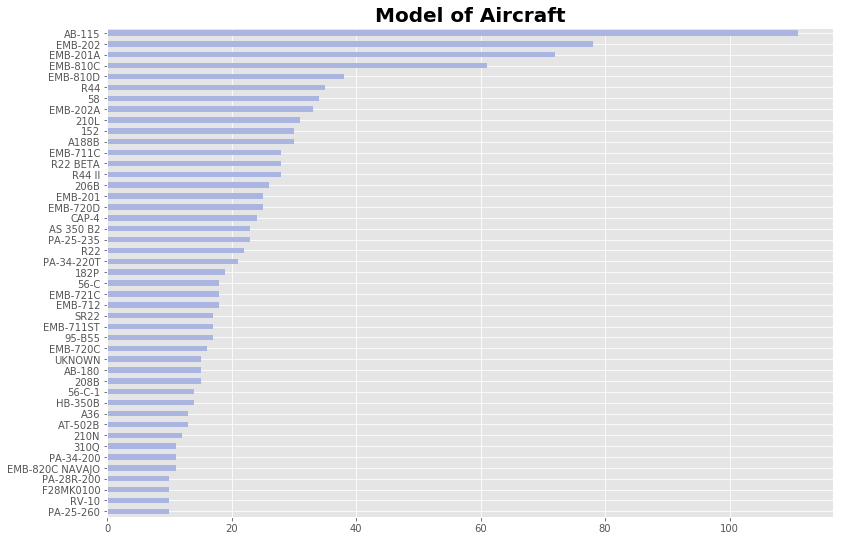

In [72]:
# reassign model to the value counts of the new dataset

model = model_data['model'].value_counts()
model = model.sort_values(ascending=True)

model.plot.barh(color='#aab5e2', figsize=(13,9))
plt.title('Model of Aircraft', fontsize=20, fontweight='bold')

__It is interesting to note here that the number one model does not come from either of the top four manufacturers.  It is manufactured by Aero Boero, the fifth in the list.  We have to account for the fact that there is missing information in the data with regards to manufacturers and models.  There are 110 missing manufacturers in the data but only 15 for the type of model.__

### k)  number of seats on aircraft

In [73]:
# aircraft seating

# convert seatings_amount to data type string so the 'nan' data can be dropped
merged_data['seatings_amount'] = merged_data['seatings_amount'].astype(str)

# select only the data for where the seatings_amount is not a nan value
merged_data = merged_data[merged_data['seatings_amount']!= 'nan'] 

# convert the seatings amount to integer type
merged_data['seatings_amount'] = merged_data['seatings_amount'].astype(float)
merged_data['seatings_amount'] = merged_data['seatings_amount'].astype(int)

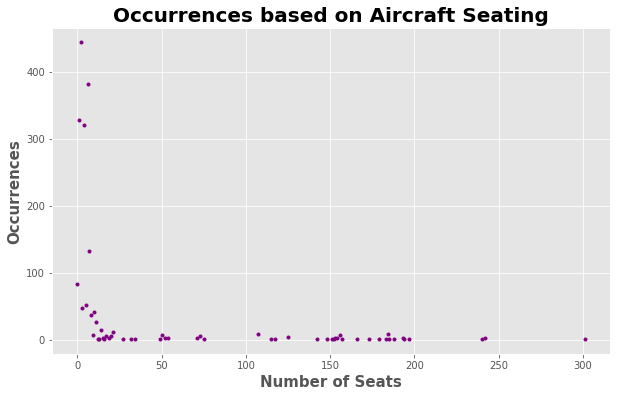

In [74]:
# plot the graph of number of seats on the aircraft

seats = merged_data['seatings_amount'].value_counts().sort_index()
plt.xlabel('Number of Seats', fontsize=15, fontweight='bold')
plt.ylabel('Occurrences', fontsize=15, fontweight='bold')
plt.title('Occurrences based on Aircraft Seating', fontsize=20, fontweight='bold')
seats.plot(style=".", color='purple', figsize=(10,6))

__Here we can see the comparison of accidents based on seating capacity.  There are relatively few accidents with the larger planes and the majority of the aircrafts involved about 15 seats and less.__

In [75]:
# fatalities - create another data set and drop the null values

data_fatal = merged_data.copy()

# drop fatalities from the original data now that we have a copy
merged_data = merged_data.drop(['fatalities_amount'], axis=1)


# convert fatalities_amount to data type string so the 'nan' data can be dropped
data_fatal['fatalities_amount'] = data_fatal['fatalities_amount'].astype(str)

# select only the data for where the seatings_amount is not a nan value
data_fatal = data_fatal[data_fatal['fatalities_amount'] != 'nan'] 

data_fatal['fatalities_amount'] = data_fatal['fatalities_amount'].astype(float)
data_fatal['fatalities_amount'] = data_fatal['fatalities_amount'].astype(int)

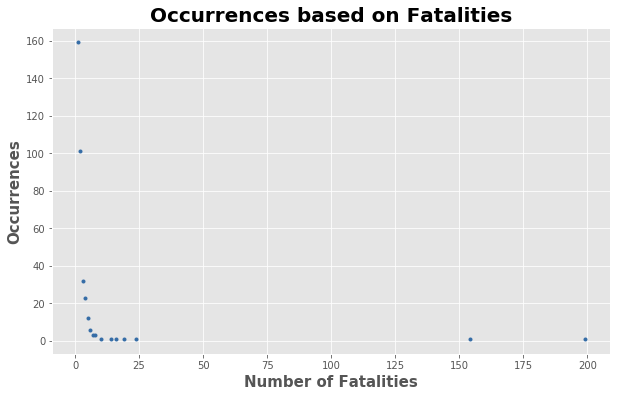

In [76]:
# graph the number of fatalaties per accident

fatal = data_fatal['fatalities_amount'].value_counts().sort_index()
plt.xlabel('Number of Fatalities', fontsize=15, fontweight='bold')
plt.ylabel('Occurrences', fontsize=15, fontweight='bold')
plt.title('Occurrences based on Fatalities', fontsize=20, fontweight='bold')
fatal.plot(style=".", color='#346ca6', figsize=(10,6))

#### It obviously makes sense that the graphs of the number of seatings chart and the fatalities will look alike .

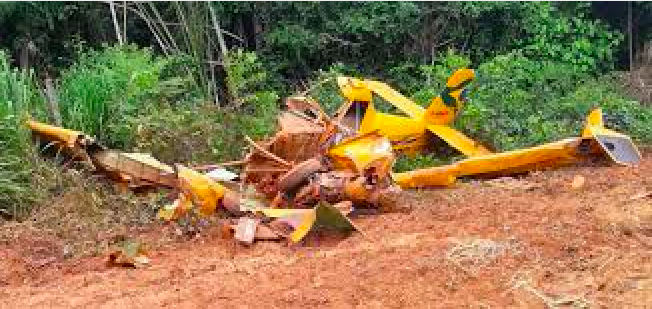

The Embraer EMB 202 Ipanema is a Brazilian agricultural aircraft used for aerial application, particularly crop dusting. It is produced by Indústria Aeronáutica Neiva, a subsidiary of Embraer located in Botucatu, Brazil. The latest version of this aircraft is the first ethanol-powered fixed-wing aircraft,[2] which could give it an economical advantage over the gasoline version. The aircraft is widely employed in Brazil, having market share of about 80%, and the 1,000th delivery was completed on 15 March 2005. 

https://en.wikipedia.org/wiki/Embraer_EMB_202_Ipanema

# Part III:  Build Machine Learning Models

### Preprocess the data

In [77]:
# check the shape of the data

merged_data.shape

(2025, 18)

In [78]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 0 to 2042
Data columns (total 18 columns):
equipment                2025 non-null object
manufacturer             2025 non-null object
model                    2025 non-null object
engine_type              2025 non-null object
engines_amount           2025 non-null int64
seatings_amount          2025 non-null int64
year_manufacture         2025 non-null float64
registration_country     2025 non-null object
registration_aviation    2025 non-null object
operation_phase          2025 non-null object
type_operation           2025 non-null object
damage_level             2025 non-null object
classification           2025 non-null object
type of occurrence       2025 non-null object
country                  2025 non-null object
time                     2025 non-null object
aircrafts_involved       2025 non-null int64
year                     2025 non-null int64
dtypes: float64(1), int64(4), object(13)
memory usage: 300.6+ KB


In [79]:
# list the different values for the target variable of damage_level

levels = list(merged_data['damage_level'].unique())
print ('damage levels:',levels)

damage levels: ['SUBSTANTIAL', 'LIGHT', 'NONE', 'UNKNOWN', 'DESTROYED']


__Replace the unknown values with the value of 'substantial' since statistically this is the most frequent value of damage (the mode).  We also will want to err on the side of overestimating the damage rather than under.__

In [80]:
merged_data['damage_level'] = (merged_data['damage_level'].replace('UNKNOWN', 'SUBSTANTIAL')).astype('str')

In [81]:
# Because some rows have been removed in the data cleaning process, the row index 
# needs to be reset.

merged_data.reset_index(drop=True, inplace=True)

In [82]:
# check the end of the data to see that the index has been set 

merged_data.tail()

equipment            manufacturer      model engine_type  engines_amount  \
2020  AIRPLANE         CESSNA AIRCRAFT       402B      PISTON               2   
2021   AIRSHIP          MAULE AIRCRAFT     UKNOWN      PISTON               1   
2022   AIRSHIP          MAULE AIRCRAFT     UKNOWN      PISTON               1   
2023  AIRPLANE  SLICK AIRCRAFT COMPANY  SLICK 540      PISTON               1   
2024  AIRPLANE          PIPER AIRCRAFT       PA34      PISTON               2   

      seatings_amount  year_manufacture registration_country  \
2020                0               0.0              URUGUAY   
2021                0               0.0               RUSSIA   
2022                0               0.0               POLAND   
2023                1               0.0               BRAZIL   
2024                0               0.0               GERMAN   

     registration_aviation operation_phase type_operation damage_level  \
2020              AEROTAXI         LANDING       AEROTAXI  SUBSTANTIAL   
2021               PRIVATE          CRUISE        PRIVATE        LIGHT   
2022               PRIVATE          CRUISE        PRIVATE        LIGHT   
2023          EXPERIMENTAL        MANEUVER        PRIVATE  SUBSTANTIAL   
2024               UNKNOWN         UNKNOWN        UNKNOWN    DESTROYED   

     classification                type of occurrence country      time  \
2020       ACCIDENT                ABOUT LANDING GEAR  BRAZIL  17:19:00   
2021       ACCIDENT    AIRCRAFTS COLLISION IN THE AIR  BRAZIL  19:30:00   
2022       ACCIDENT    AIRCRAFTS COLLISION IN THE AIR  BRAZIL  19:30:00   
2023       ACCIDENT        LOSS OF CONTROL IN THE AIR  BRAZIL  18:50:00   
2024       ACCIDENT  ENGINE FAILURE DURING THE FLIGHT  BRAZIL  20:45:00   

      aircrafts_involved  year  
2020                   1  2014  
2021                   2  2014  
2022                   2  2014  
2023                   1  2015  
2024                   1  2007

In [83]:
# Encode the labels for damage level - use LabelEncoder for target variable
# add a column 'damage_level_enc' for the encoded labels

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_data['damage_level_enc'] = pd.DataFrame(le.fit_transform(merged_data['damage_level']))

print(merged_data.head(3))

# for more information see documentation at: 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

  equipment                 manufacturer   model engine_type  engines_amount  \
0  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA    56-C      PISTON               1   
1  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA    56-C      PISTON               1   
2  AIRPLANE               BEECH AIRCRAFT  95-B55      PISTON               2   

   seatings_amount  year_manufacture registration_country  \
0                2            1962.0               BRAZIL   
1                2            1960.0               BRAZIL   
2                6            1966.0               BRAZIL   

  registration_aviation    operation_phase type_operation damage_level  \
0           INSTRUCTION            UNKNOWN    INSTRUCTION  SUBSTANTIAL   
1           INSTRUCTION            TAKEOFF    INSTRUCTION        LIGHT   
2              AEROTAXI  RUN AFTER LANDING       AEROTAXI  SUBSTANTIAL   

     classification             type of occurrence country      time  \
0          ACCIDENT                        UNKNOWN  BRAZIL  20:00

We see that the new column has been added with numric values equivalent to the different values in the damage_level column

In [84]:
# look at the encoded column to verify information

merged_data['damage_level_enc']

0       3
1       1
2       3
3       1
4       2
5       3
6       3
7       3
8       2
9       3
10      2
11      3
12      3
13      2
14      3
15      1
16      3
17      3
18      3
19      2
20      3
21      3
22      2
23      0
24      2
25      3
26      3
27      1
28      1
29      3
       ..
1995    3
1996    3
1997    3
1998    2
1999    0
2000    3
2001    3
2002    2
2003    3
2004    2
2005    3
2006    3
2007    2
2008    1
2009    0
2010    3
2011    2
2012    3
2013    1
2014    3
2015    3
2016    3
2017    3
2018    3
2019    0
2020    3
2021    1
2022    1
2023    3
2024    0
Name: damage_level_enc, Length: 2025, dtype: int64

__The data has been cleaned and ready for machine learning.__ 

## I.  Logistic Regression Model
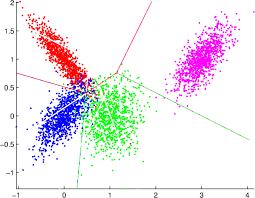
### Process:

* Normalization 
* Define X and y
* Train-Test Split
* Fit a Model
* Predict
* Generate a Confusion Matrix
* Calculate Evaluation Metrics

### Step 1:  Define X and y

#### First we have to create dummy variables for the features we are using before using them to define X and y

In [85]:
# select the features from the data to use for machine learning

x_feats = ['equipment', 'engine_type', 'registration_aviation', 'engines_amount', 'operation_phase', 'type_operation', 'classification', 'type of occurrence']
X = pd.get_dummies(merged_data[x_feats])

y = merged_data['damage_level_enc']

In [86]:
# check the converted features

X.head()

engines_amount  equipment_AIRPLANE  equipment_AIRSHIP  \
0               1                   1                  0   
1               1                   1                  0   
2               2                   1                  0   
3               1                   1                  0   
4               2                   1                  0   

   equipment_AMPHIBIOUS  equipment_GLIDER  equipment_HELICOPTER  \
0                     0                 0                     0   
1                     0                 0                     0   
2                     0                 0                     0   
3                     0                 0                     0   
4                     0                 0                     0   

   equipment_ULTRALIGHT  engine_type_JET  engine_type_PISTON  \
0                     0                0                   1   
1                     0                0                   1   
2                     0                0                   1   
3                     0                0                   1   
4                     0                1                   0   

   engine_type_TURBOPROP             ...              \
0                      0             ...               
1                      0             ...               
2                      0             ...               
3                      0             ...               
4                      0             ...               

   type of occurrence_PHYSIOLOGICAL PROBLEMS  type of occurrence_SLOW LANDING  \
0                                          0                                0   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   
4                                          0                                0   

   type of occurrence_SMOKE IN THE CABIN  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   type of occurrence_SPATIAL UNAWARENESS  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   type of occurrence_STRUCTURAL FAILURE  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   type of occurrence_SYSTEM / COMPONENT FAILURE  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   type of occurrence_TERRAIN COLLISION  type of occurrence_TIRE BURST  \
0                                     0                              0   
1                                     0                              0   
2                                     0                              0   
3                                     0                              0   
4                                     0                              0   

   type of occurrence_TRACK INCURSION  type of occurrence_UNKNOWN  
0                                   0                           1  
1                                   0                           0  
2                                   0                           0  
3                                   0                           0  
4                                   0                           0  

[5 rows x 109 columns]

In [87]:
# check the target variable

y.head()

0    3
1    1
2    3
3    1
4    2
Name: damage_level_enc, dtype: int64

### Normalization is not needed for this dataset so we can proceed to the Train Test Split phase


### Step 2: Train-Test Split

In [88]:
# divide the data for training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1215, 109) (810, 109) (1215,) (810,)


### Step 3:  Fit a Model

In [89]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12)
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### Step 4: Predict

In [90]:
# get predictions for our training and testing data

y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [91]:
# residuals are the values between the actual y value and the predicted y value
# check the residuals for the training data

residuals = np.abs(y_train - y_hat_train)

print (pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    892
3    155
2    112
1     56
Name: damage_level_enc, dtype: int64
0    0.734156
3    0.127572
2    0.092181
1    0.046091
Name: damage_level_enc, dtype: float64


#### In this run, 892 cases were correctly predicted.  This equates to 73.4%

In [92]:
# now check the residuals for the test data

residuals = np.abs(y_test - y_hat_test)

print (pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    525
3    125
2     97
1     63
Name: damage_level_enc, dtype: int64
0    0.648148
3    0.154321
2    0.119753
1    0.077778
Name: damage_level_enc, dtype: float64


#### For the testing data, 525 were correctly categorized, which is 64.8%.

### The classifier was 73.4% accurate with the training data and 64.8% with the test data

### Step 6.  Generate a Confusion Matrix

With a confusion matrix, we can see which damage levels were more often correctly labeled, as well as those that were mislabeled the majority of the time.

"A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.
It allows easy identification of confusion between classes e.g. one class is commonly mislabeled as the other. Most performance measures are computed from the confusion matrix."
geeksforgeeks.org/confusion-matrix-machine-learning/

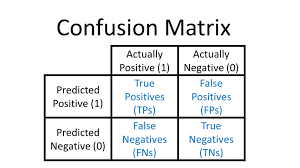

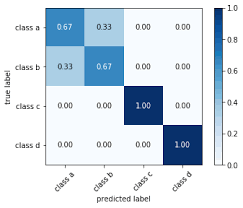

The results from the confusion matrix enable us to calculate different evaluation metrics for our classification problem. These metrics include precision, recall, accuracy, and the F-1 score.

For more of an explanation of a confusion matrix, visit:
https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

See https://www.youtube.com/watch?v=8Oog7TXHvFY at 24:30 to learn about reading a confusion matrix for a multi-categorical classification model

In [93]:
# generate a multi-categorical confusion matrix (code adapted from lab dsc-3-27-08)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_hat_test)
cm

array([[ 52,   1,   0,  83],
       [  6,  12,  11,  78],
       [  2,  10,  33,  25],
       [ 42,  17,  10, 428]])

### Damage Levels:
* 0 - Destroyed
* 1 - Light
* 2 - None
* 3 - Substantial

The true labels run down the left side of the matrix, damage level categories 0 thru 3
The predicted labels run across the top (or bottom) of the matrix.
The diagonal numbers of the matrix represents how many times the true value was predicted correctly for each category. 



As you can see, the model did not predict the damage level very well except for damage level 3.  This makes sense if we look back of the graph of airplane accidents compared to helicopter.  As we can see, the damage level of 'substantial' is significantly higher than the other categories.  There may not be enough information in the data to be able to better distinguish between some of the other levels of damage.

### Visualize the confusion matrix

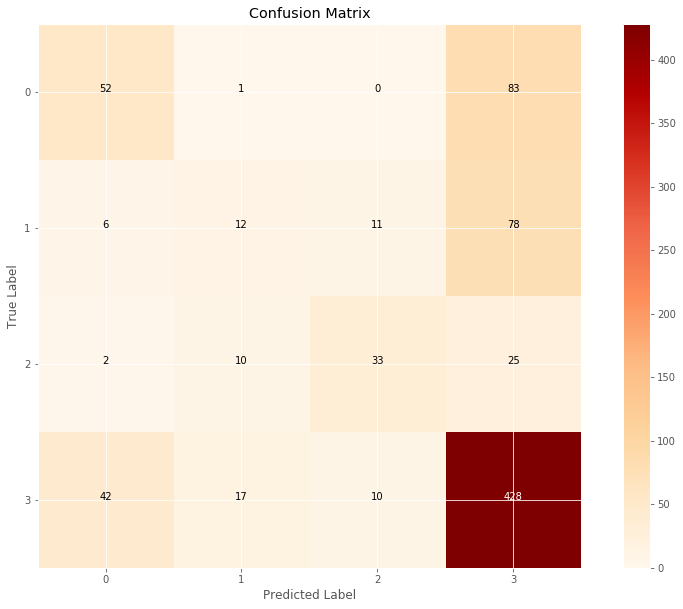

In [94]:
# visualize the confusion matrix

import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(15,10))  # added to change figure size
    plt.imshow(cf, cmap=plt.cm.OrRd)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

show_cf(y_test, y_hat_test)

### Damage Levels:
* 0 - Destroyed
* 1 - Light
* 2 - None
* 3 - Substantial

Ideally, the diagonal of this matrix would be shaded darker than the areas above or below it. This would mean that the true label was predicted correctly the majority of the time. Looking at the diagonal, we can see that damage_level 3 (substantial), was correctly classified the most, and damage_level 1 (light), was classified incorrectly the most.

### Calculate the Evaluation Metrics

In [95]:
from sklearn.metrics import classification_report, accuracy_score

In [96]:
print (classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.51      0.38      0.44       136
           1       0.30      0.11      0.16       107
           2       0.61      0.47      0.53        70
           3       0.70      0.86      0.77       497

   micro avg       0.65      0.65      0.65       810
   macro avg       0.53      0.46      0.48       810
weighted avg       0.61      0.65      0.61       810



In [97]:
print ('Accuracy Score:', accuracy_score(y_test, y_hat_test))

Accuracy Score: 0.6481481481481481


### Which Metric to Use?
We can see from the classification report that the precision scores and recall scores differ fairly significantly for the different target classes.

Precision is a good metric to use when the cost of a false positive is high.  However, when there is a high cost associated with a false negative, then the metric to use is recall.  

"Recall is the opposite of precision, it measures false negatives against true positives. False negatives are especially important to prevent in disease detection and other predictions involving safety." Philip Kiely from his blog: https://blog.floydhub.com/a-pirates-guide-to-accuracy-precision-recall-and-other-scores/

Because we are dealing with data associated with accidents and potential fatalities, safety is an important concern.  In this project, the recall score will be the metric that is the most important to focus on.

For a good explanation on multiclass metrics checkout the following blog:
https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2

#### The recall score is 65%

### Using a Pipeline with Logistic Regression

Pipelines are extremely useful tools to write clean and manageable code for machine learning. Recall how we start preparing our data set: we want to clean our data, transform it, potentially use feature selection, and then run a machine learning algorithm. All of this can be done in one procedure using a pipeline.

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipe_linreg = Pipeline([('pca', PCA(n_components=25, random_state=123)),
                 ('clf', LogisticRegression(random_state=123))])

# fit the pipeline
pipe_linreg.fit(X_train, y_train)

# print result
print (pipe_linreg.score(X_test, y_test))

0.6506172839506172


Using the pipeline gave us just a very slight improvement over the logistic regression model.

## II. Multi-class AdaBoosted Decision Trees
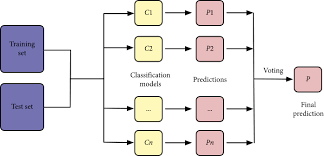

Because this data has multi-class categories rather than a binany classification, I couldn't use the regular random forest or adaboost models. 

#### The following text and block of code is taken from:
https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-download-auto-examples-ensemble-plot-adaboost-multiclass-py

The performance of the SAMME and SAMME.R 1 algorithms are compared. SAMME.R uses the probability estimates to update the additive model, while SAMME uses the classifications only. As the example illustrates, the SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations. The error of each algorithm on the test set after each boosting iteration is shown on the left, the classification error on the test set of each tree is shown in the middle, and the boost weight of each tree is shown on the right. All trees have a weight of one in the SAMME.R algorithm and therefore are not shown.

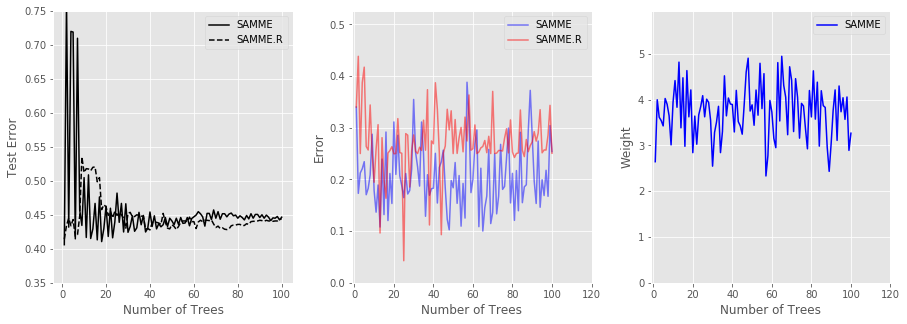

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

n_split = 50

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.35, 0.75)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((0,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-1, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-1, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

In [100]:
#Create some predictions using each model so that we can calculate the training 
# and testing accuracy for each

bdt_real_train_preds = bdt_real.predict(X_train)
bdt_real_test_preds = bdt_real.predict(X_test)
bdt_disc_train_preds = bdt_discrete.predict(X_train)
bdt_disc_test_preds = bdt_discrete.predict(X_test)

#### The following block of code from:
https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1

In [101]:
# Print the confusion matrix for SAMME.R

from sklearn import metrics
from sklearn.metrics import classification_report


print(metrics.confusion_matrix(y_test, bdt_real_test_preds))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, bdt_real_test_preds, digits=3))

[[ 78  15   0 245]
 [ 10  77  39 125]
 [  3  40  58  57]
 [152 163  28 885]]
              precision    recall  f1-score   support

           0      0.321     0.231     0.269       338
           1      0.261     0.307     0.282       251
           2      0.464     0.367     0.410       158
           3      0.675     0.721     0.697      1228

   micro avg      0.556     0.556     0.556      1975
   macro avg      0.430     0.406     0.414      1975
weighted avg      0.545     0.556     0.548      1975



#### The recall score  for SAMME.R is only 55%

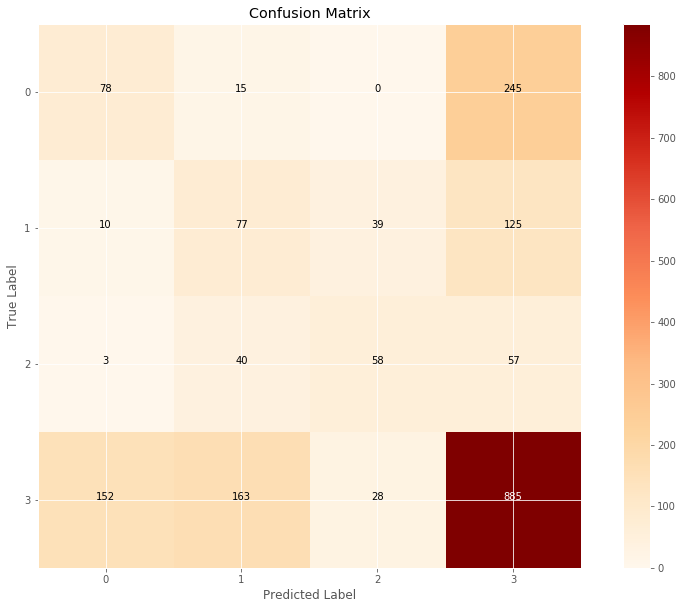

In [102]:
# Graph confusion matrix for SAMME.R
show_cf(y_test, bdt_real_test_preds)

In [103]:
real_accuracy = metrics.accuracy_score(y_test, bdt_real_test_preds, normalize=True, sample_weight=None)
print ('SAMME.R model accuracy: ',real_accuracy)

SAMME.R model accuracy:  0.5559493670886076


In [104]:
# Print the confusion matrix for SAMME
from sklearn import metrics
from sklearn.metrics import classification_report


print(metrics.confusion_matrix(y_test, bdt_disc_test_preds))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, bdt_disc_test_preds, digits=3))

[[ 37   7   0 294]
 [  8  74  44 125]
 [  1  43  59  55]
 [106 154  45 923]]
              precision    recall  f1-score   support

           0      0.243     0.109     0.151       338
           1      0.266     0.295     0.280       251
           2      0.399     0.373     0.386       158
           3      0.661     0.752     0.703      1228

   micro avg      0.553     0.553     0.553      1975
   macro avg      0.392     0.382     0.380      1975
weighted avg      0.518     0.553     0.530      1975



#### SAMME recall score is 53.9%

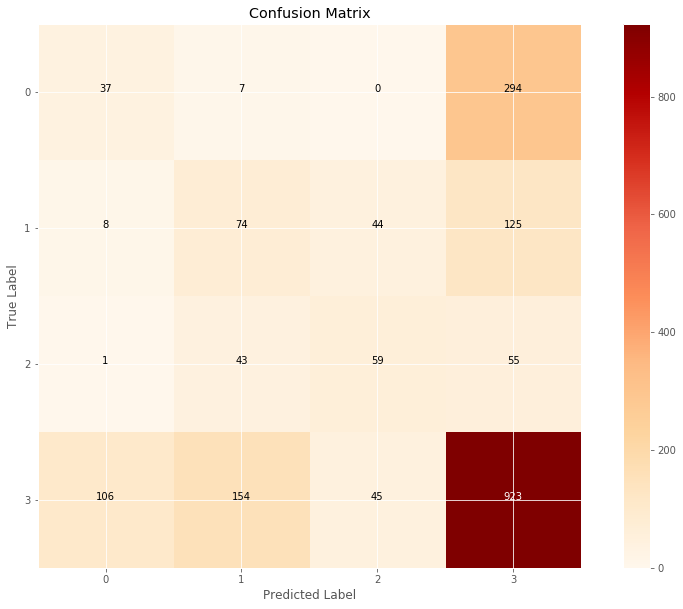

In [105]:
# graph confusion matrix for SAMME
show_cf(y_test, bdt_disc_test_preds)

In [106]:
# Get the accuracy score for SAMME

from sklearn.metrics import accuracy_score

disc_accuracy = metrics.accuracy_score(y_test, bdt_disc_test_preds, normalize=True, sample_weight=None)
print('SAMME model accuracy: ', disc_accuracy)

SAMME model accuracy:  0.5534177215189874


So far the logistical regression model with the pipeline has the best performance.

Let's explore some deep learning models to see if better performance can be achieved

## III.  Deep Learning Model
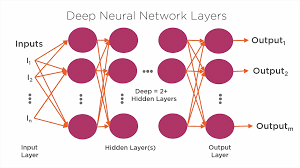

In [107]:
features = ['equipment','engine_type','engines_amount','registration_aviation','operation_phase','type_operation','classification','type of occurrence']

print(features)
merged_data[features].head()

['equipment', 'engine_type', 'engines_amount', 'registration_aviation', 'operation_phase', 'type_operation', 'classification', 'type of occurrence']


equipment engine_type  engines_amount registration_aviation  \
0  AIRPLANE      PISTON               1           INSTRUCTION   
1  AIRPLANE      PISTON               1           INSTRUCTION   
2  AIRPLANE      PISTON               2              AEROTAXI   
3  AIRPLANE      PISTON               1               PRIVATE   
4  AIRPLANE         JET               2               REGULAR   

     operation_phase type_operation    classification  \
0            UNKNOWN    INSTRUCTION          ACCIDENT   
1            TAKEOFF    INSTRUCTION  SERIOUS INCIDENT   
2  RUN AFTER LANDING       AEROTAXI          ACCIDENT   
3  RUN AFTER LANDING        PRIVATE  SERIOUS INCIDENT   
4          ASCENSION        REGULAR  SERIOUS INCIDENT   

                 type of occurrence  
0                           UNKNOWN  
1     LOSS OF CONTROL ON THE GROUND  
2                ABOUT LANDING GEAR  
3                ABOUT LANDING GEAR  
4  ENGINE FAILURE DURING THE FLIGHT

In [108]:
features_data = pd.get_dummies(merged_data[features])

In [109]:
features_data.head()

engines_amount  equipment_AIRPLANE  equipment_AIRSHIP  \
0               1                   1                  0   
1               1                   1                  0   
2               2                   1                  0   
3               1                   1                  0   
4               2                   1                  0   

   equipment_AMPHIBIOUS  equipment_GLIDER  equipment_HELICOPTER  \
0                     0                 0                     0   
1                     0                 0                     0   
2                     0                 0                     0   
3                     0                 0                     0   
4                     0                 0                     0   

   equipment_ULTRALIGHT  engine_type_JET  engine_type_PISTON  \
0                     0                0                   1   
1                     0                0                   1   
2                     0                0                   1   
3                     0                0                   1   
4                     0                1                   0   

   engine_type_TURBOPROP             ...              \
0                      0             ...               
1                      0             ...               
2                      0             ...               
3                      0             ...               
4                      0             ...               

   type of occurrence_PHYSIOLOGICAL PROBLEMS  type of occurrence_SLOW LANDING  \
0                                          0                                0   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   
4                                          0                                0   

   type of occurrence_SMOKE IN THE CABIN  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   type of occurrence_SPATIAL UNAWARENESS  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   type of occurrence_STRUCTURAL FAILURE  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   type of occurrence_SYSTEM / COMPONENT FAILURE  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   type of occurrence_TERRAIN COLLISION  type of occurrence_TIRE BURST  \
0                                     0                              0   
1                                     0                              0   
2                                     0                              0   
3                                     0                              0   
4                                     0                              0   

   type of occurrence_TRACK INCURSION  type of occurrence_UNKNOWN  
0                                   0                           1  
1                                   0                           0  
2                                   0                           0  
3                                   0                           0  
4                                   0                           0  

[5 rows x 109 columns]

In [110]:
type(features_data)

pandas.core.frame.DataFrame

In [111]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Columns: 109 entries, engines_amount to type of occurrence_UNKNOWN
dtypes: int64(1), uint8(108)
memory usage: 229.5 KB


In [112]:
features_data = features_data.astype(float)

In [113]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Columns: 109 entries, engines_amount to type of occurrence_UNKNOWN
dtypes: float64(109)
memory usage: 1.7 MB


In [114]:
target_data = merged_data['damage_level']

In [115]:
target_data.head()

0    SUBSTANTIAL
1          LIGHT
2    SUBSTANTIAL
3          LIGHT
4           NONE
Name: damage_level, dtype: object

### K-Fold Cross Validation

K-Fold Cross Validation expands on the idea of training and testing splits by splitting the entire dataset into {K} equal sections of data. We'll then iteratively train {K} linear regression models on the data, with each linear model using a different section of data as the testing set, and all other sections combined as the training set.

We can then average the individual results from each of these linear models to get a Cross-Validation MSE. This will be closer to the model's actual MSE, since "noisy" results that are higher than average will cancel out the "noisy" results that are lower than average.

(Information taken from Mod1 Section11 Introduction to Cross Validation)

In [116]:
# the following keras code is adapted from https://www.kaggle.com/chadwickcasper/deep-music

# Split the data into 9 different folds, each containing the whole set
# The folds contain two parts:
# index:0 the larger (8/9'ths) piece - (the features)
# index:1 the smaller (1/9'th) piece - (the label)

from sklearn.model_selection import StratifiedKFold
import random

folds = 9
random_state = random_state = random.randint(1,200)
cv = StratifiedKFold(n_splits=folds,
                     shuffle=True,
                     random_state=random_state,
                     )

kfold_data = list(cv.split(features_data, target_data))


### Building a Keras Model
Information adapted from Mod4 Section41 - Introduction to keras

In [117]:
#  import keras libraries

from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


### Deciding on the network architecture

The type of network used to build the model needs to be defined. For this case, the sequential architecture will be used which builds one layer upon the previous one.

model = models.Sequential()

### Adding layers
Once we have initialized a network object, we can then add layers to the network which includes the number of layers we wish to add, as well as which activiation function to use. Sigmoid and ReLu are examples of activation functions.

The Dense method indicates that this layer will be fully connected. 

Finally, the input_shape parameter is often optional. That is, in successive layers, Keras implies the required shape of the layer to be added based on the shape of the previous layer.

In [118]:
model = models.Sequential([
    layers.Dense(28, activation='relu'),
    layers.Dense(19, activation='relu'),
    layers.Dense(10, activation='softmax')
])

W0420 12:52:01.948965 4486620608 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



### Compiling the model

Once we have defined the network architecture and added layers to that network, we then compile the model before training that model on our data.  

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

Notice that this is also where the loss function is defined.

In [119]:
# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0420 12:52:01.995425 4486620608 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### test run with the first fold:

In [120]:
first_fold = kfold_data[0]
train_indices, test_indices = first_fold[0], first_fold[1]

train_data = features_data.iloc[train_indices]
train_labels = merged_data['damage_level_enc'].iloc[train_indices]

test_data = features_data.iloc[test_indices]
test_labels = merged_data['damage_level_enc'].iloc[test_indices]

### Training the model

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Here's some further notes regarding these terms from the Keras documentation FAQ:


* **Sample**: one element of a dataset.  
    * *Example*: one image is a sample in a convolutional network  
    * *Example*: one audio file is a sample for a speech recognition model  
    
* **Batch**: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.  
* A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* **Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).


In [121]:
# Train the model
history = model.fit(train_data.values, train_labels.values, epochs=15)

W0420 12:52:02.148186 4486620608 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0420 12:52:02.157109 4486620608 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0420 12:52:02.271524 4486620608 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0420 12:52:02.426831 4486620608 deprecation.py:323] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.p

Epoch 1/15
1798/1798 [==============================] - 0s 264us/step - loss: 1.8756 - acc: 0.5273
Epoch 2/15
1798/1798 [==============================] - 0s 112us/step - loss: 1.2255 - acc: 0.6201 0s - loss: 1.3387 - acc: 0.61
Epoch 3/15
1798/1798 [==============================] - 0s 74us/step - loss: 0.9703 - acc: 0.6268: 0s - loss: 0.9757 - acc: 0.628
Epoch 4/15
1798/1798 [==============================] - 0s 112us/step - loss: 0.8562 - acc: 0.6407
Epoch 5/15
1798/1798 [==============================] - 0s 66us/step - loss: 0.8087 - acc: 0.6541
Epoch 6/15
1798/1798 [==============================] - 0s 58us/step - loss: 0.7782 - acc: 0.6758
Epoch 7/15
1798/1798 [==============================] - 0s 55us/step - loss: 0.7594 - acc: 0.6846
Epoch 8/15
1798/1798 [==============================] - 0s 66us/step - loss: 0.7402 - acc: 0.6969
Epoch 9/15
1798/1798 [==============================] - 0s 67us/step - loss: 0.7313 - acc: 0.6930
Epoch 10/15
1798/1798 [==============================

In [122]:
# print the loss and accuracy for the first fold training data

model.evaluate(train_data.values, train_labels.values)

1798/1798 [==============================] - 0s 71us/step


[0.670427148745243, 0.7291434928360452]

In [123]:
# print the loss and accuracy for the first fold testing data

model.evaluate(test_data.values, test_labels.values)

227/227 [==============================] - 0s 45us/step


[0.8285598124701546, 0.6828193833911996]

dict_keys(['loss', 'acc'])


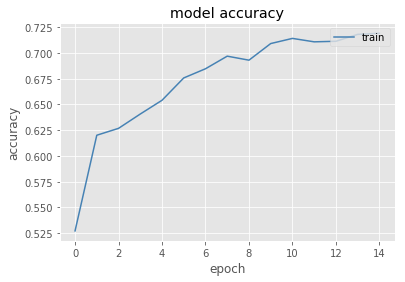

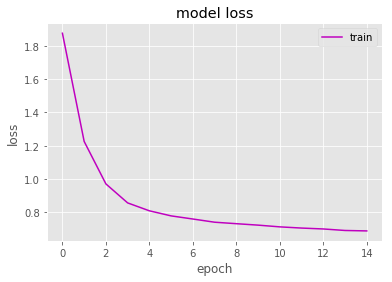

In [124]:
# print the labels of the history contents:
print(history.history.keys())

# graph the results for the one fold model
# summarize history for accuracy
plt.plot(history.history['acc'], color = 'steelblue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], color = 'm')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

## now train the model using all the folds:
Train the model on the k folds. See what kind of profiles the loss and accuracy curves take

W0420 12:52:05.721459 4486620608 deprecation.py:506] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training on fold 0 ...
Training on fold 1 ...
Training on fold 2 ...
Training on fold 3 ...
Training on fold 4 ...
Training on fold 5 ...
Training on fold 6 ...
Training on fold 7 ...
Training on fold 8 ...


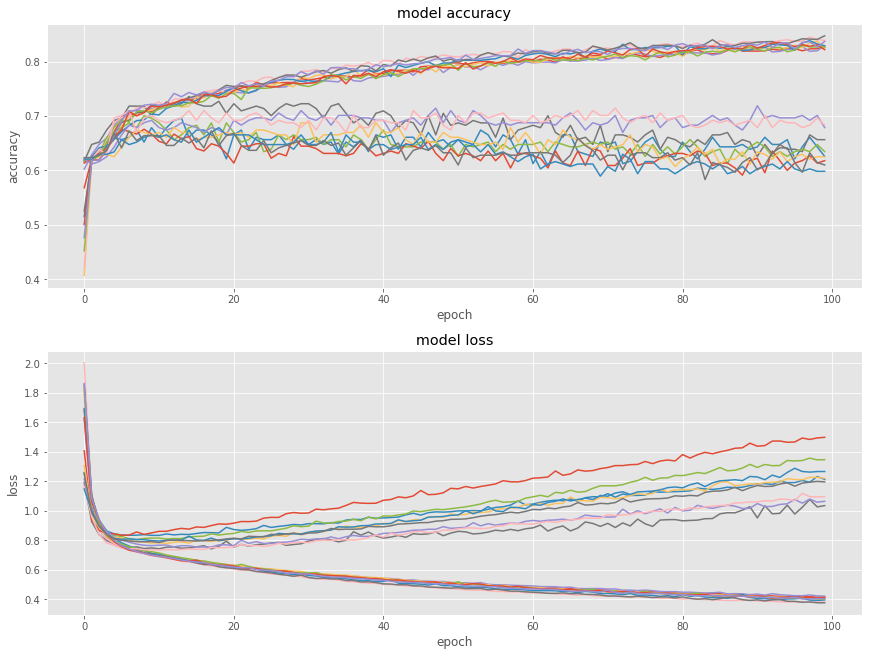

In [125]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = features_data.iloc[train_indices]
    train_labels = merged_data['damage_level_enc'].iloc[train_indices]
    test_data = features_data.iloc[test_indices]
    test_labels = merged_data['damage_level_enc'].iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=100,
                        batch_size=20,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )
    
    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')
# axs[0].legend(loc='upper left')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')
# axs[1].legend(loc='upper left')

In [126]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

1802/1802 [==============================] - 0s 101us/sample - loss: 0.3840 - acc: 0.8496


[0.3839764959704995, 0.8496115]

In [127]:
# print the accuracy for the testing data

model.evaluate(test_data.values, test_labels.values)

223/223 [==============================] - 0s 66us/sample - loss: 1.1958 - acc: 0.6099


[1.1958005984267845, 0.6098655]

#### Let's try to use regularization & dropout and see if that gives us better results

Training on fold 0 ...
Training on fold 1 ...
Training on fold 2 ...
Training on fold 3 ...
Training on fold 4 ...
Training on fold 5 ...
Training on fold 6 ...
Training on fold 7 ...
Training on fold 8 ...
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
Test Accuracy =  [0.6233184, 0.6367713, 0.6367713, 0.6412556, 0.6547085, 0.67713004, 0.67264575, 0.68161434, 0.67713004, 0.69058293, 0.67264575, 0.6591928, 0.66367716, 0.66367716, 0.67264575, 0.6547085, 0.66816145, 0.67713004, 0.66367716, 0.6457399, 0.6412556, 0.6591928, 0.66367716, 0.6547085, 0.6457399, 0.6547085, 0.6457399, 0.6502242, 0.6502242, 0.6547085, 0.6412556, 0.6457399, 0.6412556, 0.6412556, 0.6457399, 0.62780267, 0.6502242, 0.66367716, 0.6412556, 0.6233184, 0.63228697, 0.63228697, 0.62780267, 0.6233184, 0.62780267, 0.63228697, 0.62780267, 0.63228697, 0.6143498, 0.6367713, 0.6098655, 0.6233184, 0.6233184, 0.63228697, 0.63228697, 0.6143498, 0.6098655, 0.6143498, 0.6188341, 0.6098655]


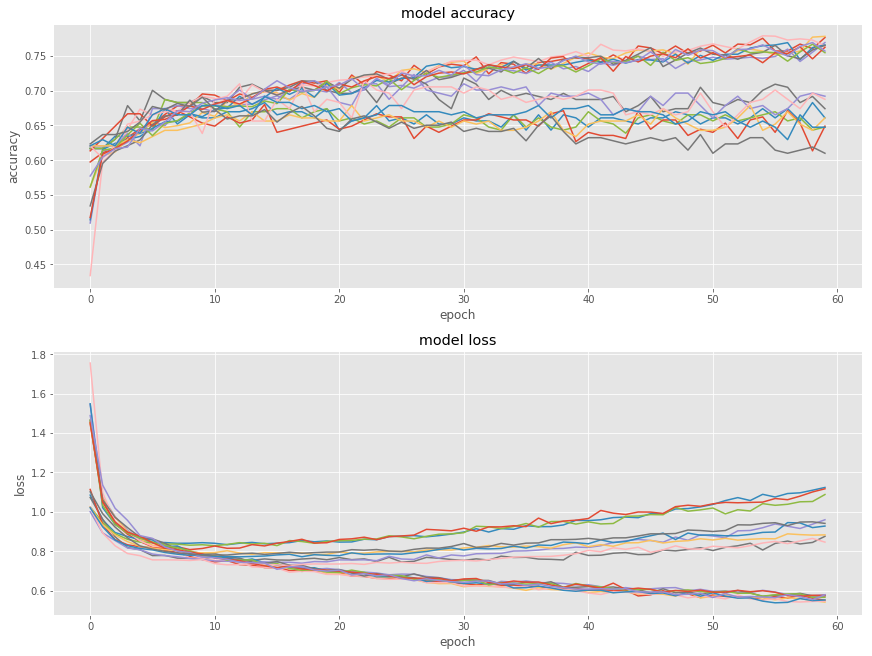

In [128]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = features_data.iloc[train_indices]
    train_labels = merged_data['damage_level_enc'].iloc[train_indices]
    test_data = features_data.iloc[test_indices]
    test_labels = merged_data['damage_level_enc'].iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=60,
                        batch_size=10,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )

    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')

print(history.history.keys())
print('Test Accuracy = ', history.history['val_acc'])

In [129]:
# print the loss and accuracy for the regularization & dropout training data

model.evaluate(train_data.values, train_labels.values)

1802/1802 [==============================] - 0s 51us/sample - loss: 0.4808 - acc: 0.8024


[0.48076202507884336, 0.8024417]

In [130]:
# print the accuracy for the testing data

test_loss, test_acc = model.evaluate(test_data.values, test_labels.values)

print('\nTest accuracy:', test_acc)

223/223 [==============================] - 0s 50us/sample - loss: 0.9419 - acc: 0.6099

Test accuracy: 0.6098655


It doesn't look like training the model longer will produce better results.

### Graph Summary for Training Data:

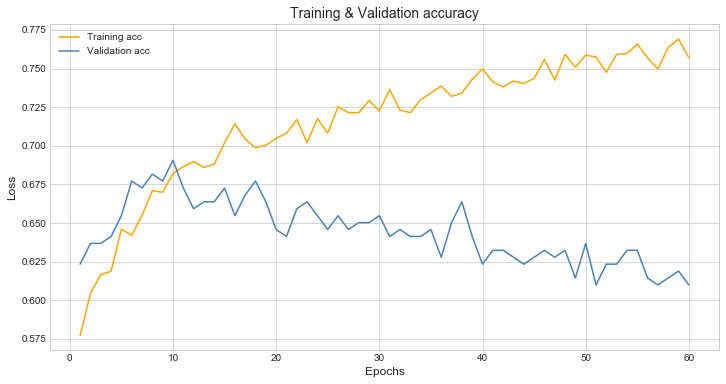

In [131]:
# https://github.com/arseniyturin/dsc-4-final-project-online-ds-sp-000/blob/master/student.ipynb

epochs = range(1, len(history.history['acc']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history.history['acc'], 'orange', label='Training acc')
plt.plot(epochs, history.history['val_acc'], 'steelblue', label='Validation acc')
plt.title('Training & Validation accuracy', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### We start to lose validation accuracy after 20 epochs.

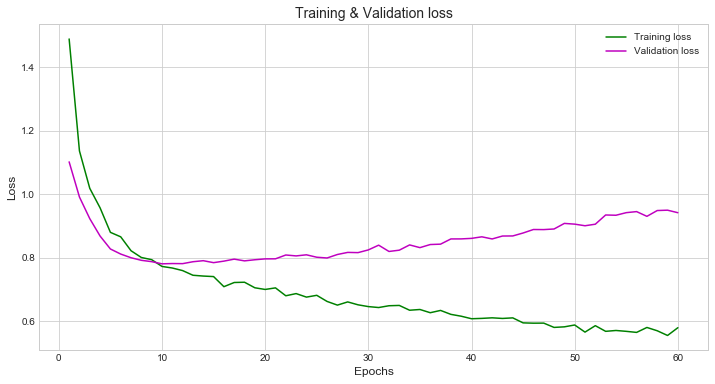

In [132]:
# https://github.com/arseniyturin/dsc-4-final-project-online-ds-sp-000/blob/master/student.ipynb

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history.history['loss'], 'g', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'm', label='Validation loss')

plt.title('Training & Validation loss',fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Validation loss starts to level off after 10 epochs  and starts to increase after 20 epochs.

## Conclusion:

### Comparing the models:


* __Logistical Regression__
> Recall score - 65% <br>
> Accuracy score - 64.8%
<br>
* __Logistical Regression with Pipeline__
> Accuracy score - 65.1%
<br>    
* __Multiclass AdaBoosted Decision Trees__
> SAMME.R - 55% for recall & accuracy <br>
> SAMME - 54%
<br>    
* __K-fold validation__
> training - 83% <br>
> testing - 66%
<br>    
* __K-fold with regularization & dropout__  
> training - 82% <br>
> testing - 62%

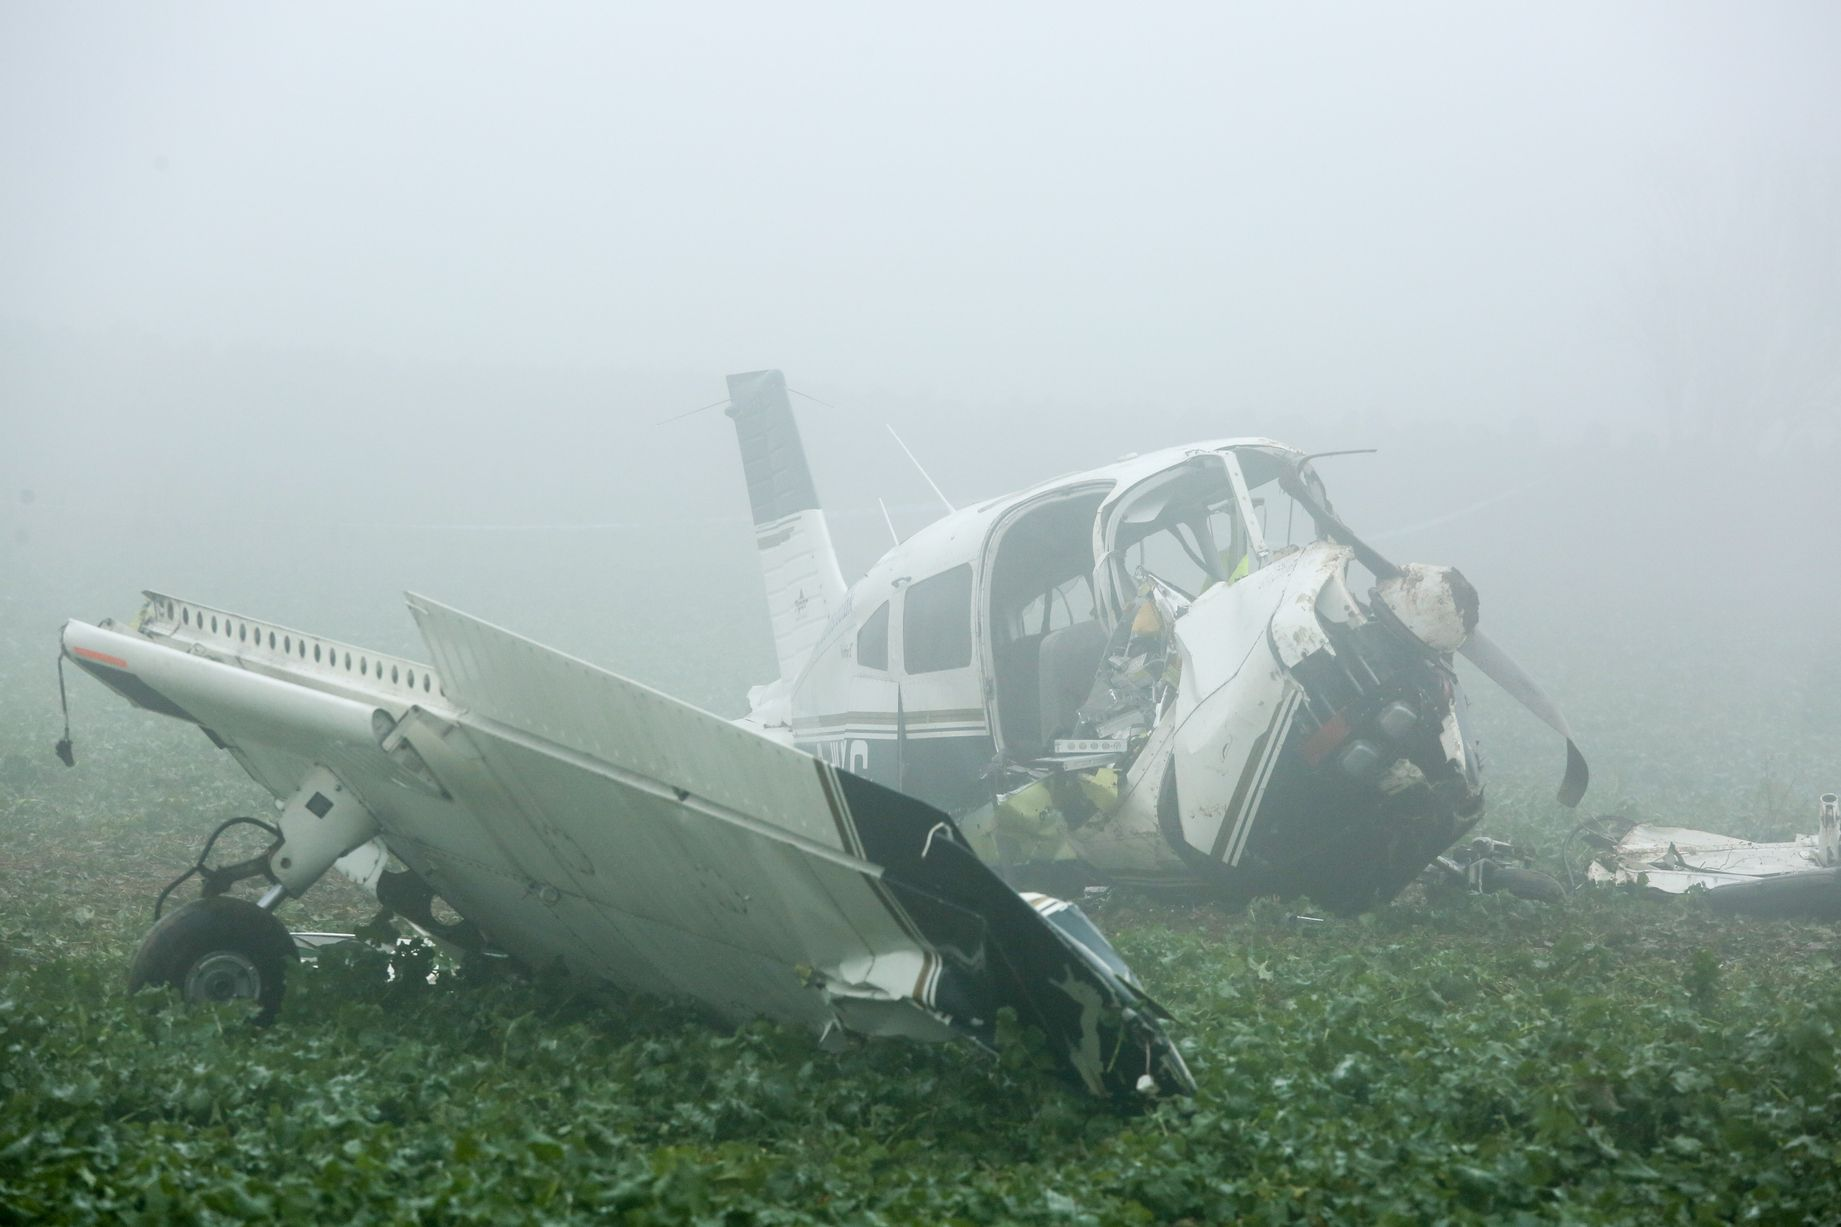

# Work for Further Consideration

I didn't investigate the time feature of the accidents and this is something that could be of interest.  I did note that the two top times were in the evening, 8pm and 8:30pm.  Time of day related to visibility would be something to look into.  Another consideration is looking at the phase of operation as it relates to the risk of fatalities, as well as how the phases of operation compare when looking at airplane versus helicopter accidents.

Unfortunately we don't have information on the experience of the pilots since this would be a valuable and influential factor in the dataset.  Another important factor missing would be the weather and visibility conditions during the time of the accident.  It would take some research but this information might be able to be determined.